# Сколько токенов?

Настроим систему; подготовим структуры данных для разных типов ошибок и заполним их всеми вхождениями из корпуса:

In [119]:
import os
import pandas as pd
import nltk

Tokens = pd.DataFrame({
    'file': [],
    'num_tokens': []
})

lex_item_choice = pd.DataFrame({
    'file': [],
    'id': [],
    'type': [],
    'start': [],
    'end': [],
    'string': [],
    'correction': []
})

lex_part_choice = pd.DataFrame({
    'file': [],
    'id': [],
    'type': [],
    'start': [],
    'end': [],
    'string': [],
    'correction': []
})

Word_choice = pd.DataFrame({
    'file': [],
    'id': [],
    'type': [],
    'start': [],
    'end': [],
    'string': [],
    'correction': []
})

Anns = 14358
I = 0
'''
Dummy = [".\\2012-2014\\esl_00011.txt", ".\\2012-2014\\esl_00012.txt", ".\\2012-2014\\esl_00013.txt", ".\\2012-2014\\esl_00014.txt", ".\\2012-2014\\esl_00015.txt", ".\\2012-2014\\esl_00016.txt"]
Dummy += [".\\2012-2014\\esl_00011.ann", ".\\2012-2014\\esl_00012.ann", ".\\2012-2014\\esl_00013.ann", ".\\2012-2014\\esl_00014.ann", ".\\2012-2014\\esl_00015.ann", ".\\2012-2014\\esl_00016.ann"]
if True:
    for file in Dummy:
'''
for root, dirs, files in os.walk('.'):
    for file in os.listdir(root):
        #path = file # !!! DELETE THIS AFTER TEST
        if file.endswith(".ann"):
            I += 1
            print(str(I)+'/'+str(Anns),'('+'{:.2f}'.format((I/Anns)*100)+'%):','Evaluating',file)
            path = root+os.sep+file
            with open(path, 'r', encoding='utf-8') as f:
                annfield = []
                TempDict = {}
                for line in f.readlines():
                    if line[0] == "A":
                        continue
                    try:
                        entry = line[:-1]
                        entry = entry.split("\t")
                        entry = [entry[0]] + entry[1].split(" ") + [entry[2]]
                        entry = [path] + entry + [None]
                        if entry[1][0] != "#":
                            entry = entry[:3] + [int(entry[3])] + [int(entry[4])] + entry[5:]
                        annfield.append(entry)
                    except Exception as e:
                        print(str(e))
                for entry in annfield:
                    if entry[2] in {'lex_item_choice', 'lex_part_choice', 'Word_choice'}:
                        TempDict[entry[1]] = entry
                for entry in annfield:
                    if entry[2] == "AnnotatorNotes":
                        if entry[3] in TempDict:
                            TempDict[entry[3]][-1] = entry[-2]
            for ID in TempDict:
                entry = TempDict[ID]
                if entry[2] == 'lex_item_choice':
                    lex_item_choice.loc[len(lex_item_choice)] = entry
                if entry[2] == 'lex_part_choice':
                    lex_part_choice.loc[len(lex_part_choice)] = entry
                if entry[2] == 'Word_choice':
                    Word_choice.loc[len(Word_choice)] = entry
        if file.endswith(".txt"):
            path = root+os.sep+file
            with open(path, 'r', encoding='utf-8') as f:
                X = nltk.word_tokenize(f.read())
                Tokens.loc[len(Tokens)] = [path, len(X)]
# print(Anns)

1/14358 (0.01%): Evaluating esl_00011.ann
invalid literal for int() with base 10: 'Arg1:T31'
2/14358 (0.01%): Evaluating esl_00012.ann
3/14358 (0.02%): Evaluating esl_00013.ann
invalid literal for int() with base 10: '826;829'
invalid literal for int() with base 10: '1441;1442'
4/14358 (0.03%): Evaluating esl_00014.ann
invalid literal for int() with base 10: '2886;2888'
invalid literal for int() with base 10: '935;936'
5/14358 (0.03%): Evaluating esl_00015.ann
6/14358 (0.04%): Evaluating esl_00016.ann
invalid literal for int() with base 10: '366;368'
invalid literal for int() with base 10: '485;486'
7/14358 (0.05%): Evaluating esl_00017.ann
invalid literal for int() with base 10: '141;142'
8/14358 (0.06%): Evaluating esl_00018.ann
9/14358 (0.06%): Evaluating esl_00019.ann
10/14358 (0.07%): Evaluating esl_00020.ann
11/14358 (0.08%): Evaluating esl_00023.ann
12/14358 (0.08%): Evaluating esl_00025.ann
13/14358 (0.09%): Evaluating esl_00027.ann
14/14358 (0.10%): Evaluating esl_00028.ann
15

172/14358 (1.20%): Evaluating esl_00242.ann
173/14358 (1.20%): Evaluating esl_00243.ann
174/14358 (1.21%): Evaluating esl_00244.ann
175/14358 (1.22%): Evaluating esl_00245.ann
176/14358 (1.23%): Evaluating esl_00246.ann
177/14358 (1.23%): Evaluating esl_00247.ann
178/14358 (1.24%): Evaluating esl_00248.ann
179/14358 (1.25%): Evaluating esl_00249.ann
180/14358 (1.25%): Evaluating esl_00250.ann
181/14358 (1.26%): Evaluating esl_00251.ann
182/14358 (1.27%): Evaluating esl_00252.ann
183/14358 (1.27%): Evaluating esl_00253.ann
184/14358 (1.28%): Evaluating esl_00254.ann
185/14358 (1.29%): Evaluating esl_00255.ann
186/14358 (1.30%): Evaluating esl_00256.ann
187/14358 (1.30%): Evaluating esl_00257.ann
188/14358 (1.31%): Evaluating esl_00258.ann
189/14358 (1.32%): Evaluating esl_00259.ann
190/14358 (1.32%): Evaluating esl_00260.ann
191/14358 (1.33%): Evaluating esl_00261.ann
192/14358 (1.34%): Evaluating esl_00262.ann
193/14358 (1.34%): Evaluating esl_00263.ann
194/14358 (1.35%): Evaluating es

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out o

300/14358 (2.09%): Evaluating esl_00371.ann
301/14358 (2.10%): Evaluating esl_00372.ann
302/14358 (2.10%): Evaluating esl_00373.ann
303/14358 (2.11%): Evaluating esl_00374.ann
304/14358 (2.12%): Evaluating esl_00375.ann
305/14358 (2.12%): Evaluating esl_00376.ann
306/14358 (2.13%): Evaluating esl_00377.ann
invalid literal for int() with base 10: '557;558'
307/14358 (2.14%): Evaluating esl_00378.ann
308/14358 (2.15%): Evaluating esl_00379.ann
309/14358 (2.15%): Evaluating esl_00380.ann
310/14358 (2.16%): Evaluating esl_00381.ann
311/14358 (2.17%): Evaluating esl_00382.ann
312/14358 (2.17%): Evaluating esl_00383.ann
313/14358 (2.18%): Evaluating esl_00384.ann
314/14358 (2.19%): Evaluating esl_00385.ann
315/14358 (2.19%): Evaluating esl_00386.ann
316/14358 (2.20%): Evaluating esl_00387.ann
317/14358 (2.21%): Evaluating esl_00388.ann
318/14358 (2.21%): Evaluating esl_00389.ann
319/14358 (2.22%): Evaluating esl_00390.ann
320/14358 (2.23%): Evaluating esl_00391.ann
321/14358 (2.24%): Evaluat

483/14358 (3.36%): Evaluating esl_00557.ann
484/14358 (3.37%): Evaluating esl_00558.ann
485/14358 (3.38%): Evaluating esl_00559.ann
486/14358 (3.38%): Evaluating esl_00560.ann
487/14358 (3.39%): Evaluating esl_00561.ann
488/14358 (3.40%): Evaluating esl_00562.ann
489/14358 (3.41%): Evaluating esl_00563.ann
490/14358 (3.41%): Evaluating esl_00564.ann
491/14358 (3.42%): Evaluating esl_00565.ann
492/14358 (3.43%): Evaluating esl_00566.ann
493/14358 (3.43%): Evaluating esl_00567.ann
494/14358 (3.44%): Evaluating esl_00568.ann
495/14358 (3.45%): Evaluating esl_00569.ann
496/14358 (3.45%): Evaluating esl_00570.ann
497/14358 (3.46%): Evaluating esl_00571.ann
498/14358 (3.47%): Evaluating esl_00572.ann
499/14358 (3.48%): Evaluating esl_00573.ann
500/14358 (3.48%): Evaluating esl_00574.ann
501/14358 (3.49%): Evaluating esl_00575.ann
502/14358 (3.50%): Evaluating esl_00576.ann
503/14358 (3.50%): Evaluating esl_00577.ann
504/14358 (3.51%): Evaluating esl_00578.ann
505/14358 (3.52%): Evaluating es

670/14358 (4.67%): Evaluating esl_00744.ann
671/14358 (4.67%): Evaluating esl_00745.ann
672/14358 (4.68%): Evaluating esl_00746.ann
673/14358 (4.69%): Evaluating esl_00747.ann
674/14358 (4.69%): Evaluating esl_00748.ann
675/14358 (4.70%): Evaluating esl_00749.ann
676/14358 (4.71%): Evaluating esl_00750.ann
677/14358 (4.72%): Evaluating esl_00752.ann
678/14358 (4.72%): Evaluating esl_00753.ann
679/14358 (4.73%): Evaluating esl_00755.ann
680/14358 (4.74%): Evaluating esl_00756.ann
681/14358 (4.74%): Evaluating esl_00757.ann
682/14358 (4.75%): Evaluating esl_00759.ann
683/14358 (4.76%): Evaluating esl_00760.ann
684/14358 (4.76%): Evaluating esl_00761.ann
685/14358 (4.77%): Evaluating esl_00762.ann
686/14358 (4.78%): Evaluating esl_00763.ann
687/14358 (4.78%): Evaluating esl_00764.ann
688/14358 (4.79%): Evaluating esl_00765.ann
689/14358 (4.80%): Evaluating esl_00766.ann
690/14358 (4.81%): Evaluating esl_00767.ann
691/14358 (4.81%): Evaluating esl_00768.ann
692/14358 (4.82%): Evaluating es

748/14358 (5.21%): Evaluating esl_00825.ann
749/14358 (5.22%): Evaluating esl_00826.ann
750/14358 (5.22%): Evaluating esl_00827.ann
751/14358 (5.23%): Evaluating esl_00828.ann
752/14358 (5.24%): Evaluating esl_00829.ann
753/14358 (5.24%): Evaluating esl_00830.ann
754/14358 (5.25%): Evaluating esl_00831.ann
755/14358 (5.26%): Evaluating esl_00832.ann
756/14358 (5.27%): Evaluating esl_00833.ann
757/14358 (5.27%): Evaluating esl_00834.ann
758/14358 (5.28%): Evaluating esl_00835.ann
759/14358 (5.29%): Evaluating esl_00836.ann
760/14358 (5.29%): Evaluating esl_00837.ann
761/14358 (5.30%): Evaluating esl_00838.ann
762/14358 (5.31%): Evaluating esl_00839.ann
763/14358 (5.31%): Evaluating esl_00840.ann
764/14358 (5.32%): Evaluating esl_00841.ann
765/14358 (5.33%): Evaluating esl_00842.ann
766/14358 (5.34%): Evaluating esl_00843.ann
767/14358 (5.34%): Evaluating esl_00844.ann
768/14358 (5.35%): Evaluating esl_00845.ann
769/14358 (5.36%): Evaluating esl_00846.ann
770/14358 (5.36%): Evaluating es

930/14358 (6.48%): Evaluating esl_01007.ann
931/14358 (6.48%): Evaluating esl_01008.ann
932/14358 (6.49%): Evaluating esl_01009.ann
933/14358 (6.50%): Evaluating esl_01010.ann
934/14358 (6.51%): Evaluating esl_01011.ann
935/14358 (6.51%): Evaluating esl_01012.ann
936/14358 (6.52%): Evaluating esl_01013.ann
937/14358 (6.53%): Evaluating esl_01014.ann
938/14358 (6.53%): Evaluating esl_01015.ann
list index out of range
list index out of range
list index out of range
939/14358 (6.54%): Evaluating esl_01016.ann
invalid literal for int() with base 10: '1698;1700'
940/14358 (6.55%): Evaluating esl_01017.ann
941/14358 (6.55%): Evaluating esl_01018.ann
942/14358 (6.56%): Evaluating esl_01019.ann
943/14358 (6.57%): Evaluating esl_01020.ann
944/14358 (6.57%): Evaluating esl_01021.ann
945/14358 (6.58%): Evaluating esl_01022.ann
946/14358 (6.59%): Evaluating esl_01023.ann
947/14358 (6.60%): Evaluating esl_01024.ann
invalid literal for int() with base 10: '30;31'
948/14358 (6.60%): Evaluating esl_01

1106/14358 (7.70%): Evaluating esl_01183.ann
1107/14358 (7.71%): Evaluating esl_01184.ann
1108/14358 (7.72%): Evaluating esl_01185.ann
1109/14358 (7.72%): Evaluating esl_01186.ann
1110/14358 (7.73%): Evaluating esl_01187.ann
1111/14358 (7.74%): Evaluating esl_01188.ann
1112/14358 (7.74%): Evaluating esl_01189.ann
1113/14358 (7.75%): Evaluating esl_01190.ann
1114/14358 (7.76%): Evaluating esl_01191.ann
1115/14358 (7.77%): Evaluating esl_01192.ann
1116/14358 (7.77%): Evaluating esl_01193.ann
1117/14358 (7.78%): Evaluating esl_01194.ann
1118/14358 (7.79%): Evaluating esl_01195.ann
1119/14358 (7.79%): Evaluating esl_01196.ann
1120/14358 (7.80%): Evaluating esl_01197.ann
1121/14358 (7.81%): Evaluating esl_01198.ann
1122/14358 (7.81%): Evaluating esl_01199.ann
1123/14358 (7.82%): Evaluating esl_01200.ann
1124/14358 (7.83%): Evaluating esl_01201.ann
1125/14358 (7.84%): Evaluating esl_01202.ann
invalid literal for int() with base 10: '423;425'
1126/14358 (7.84%): Evaluating esl_01203.ann
1127/

1256/14358 (8.75%): Evaluating student19_revised.ann
1257/14358 (8.75%): Evaluating student2.ann
1258/14358 (8.76%): Evaluating student20.ann
1259/14358 (8.77%): Evaluating student20_revised.ann
1260/14358 (8.78%): Evaluating student21.ann
1261/14358 (8.78%): Evaluating student22.ann
1262/14358 (8.79%): Evaluating student22_revised.ann
1263/14358 (8.80%): Evaluating student23.ann
1264/14358 (8.80%): Evaluating student23_revised.ann
1265/14358 (8.81%): Evaluating student24.ann
1266/14358 (8.82%): Evaluating student24_revised.ann
1267/14358 (8.82%): Evaluating student25_revised.ann
1268/14358 (8.83%): Evaluating student26.ann
1269/14358 (8.84%): Evaluating student27.ann
1270/14358 (8.85%): Evaluating student27_revised.ann
1271/14358 (8.85%): Evaluating student28.ann
1272/14358 (8.86%): Evaluating student29.ann
1273/14358 (8.87%): Evaluating student29_revised.ann
1274/14358 (8.87%): Evaluating student2_revised.ann
1275/14358 (8.88%): Evaluating student3.ann
1276/14358 (8.89%): Evaluating 

1423/14358 (9.91%): Evaluating student37_ex.ann
1424/14358 (9.92%): Evaluating student37_review.ann
1425/14358 (9.92%): Evaluating student37_revised.ann
1426/14358 (9.93%): Evaluating student38.ann
1427/14358 (9.94%): Evaluating student38_critique.ann
1428/14358 (9.95%): Evaluating student39_ex.ann
1429/14358 (9.95%): Evaluating student40_ex.ann
1430/14358 (9.96%): Evaluating student40_review.ann
1431/14358 (9.97%): Evaluating student40_review_revised.ann
1432/14358 (9.97%): Evaluating student41.ann
1433/14358 (9.98%): Evaluating student41_review.ann
1434/14358 (9.99%): Evaluating student41_review_revised.ann
1435/14358 (9.99%): Evaluating student43_ex.ann
1436/14358 (10.00%): Evaluating student43_review.ann
1437/14358 (10.01%): Evaluating student44_ex.ann
1438/14358 (10.02%): Evaluating student44_review.ann
1439/14358 (10.02%): Evaluating student44_review_revised.ann
1440/14358 (10.03%): Evaluating student45_ex.ann
1441/14358 (10.04%): Evaluating student45_review.ann
1442/14358 (10.04

1558/14358 (10.85%): Evaluating 36_2.ann
invalid literal for int() with base 10: 'Arg1:T19'
invalid literal for int() with base 10: 'Arg1:T22'
1559/14358 (10.86%): Evaluating 37_1.ann
1560/14358 (10.87%): Evaluating 37_2.ann
1561/14358 (10.87%): Evaluating 38_1.ann
1562/14358 (10.88%): Evaluating 38_2.ann
1563/14358 (10.89%): Evaluating 39_1.ann
1564/14358 (10.89%): Evaluating 39_2.ann
1565/14358 (10.90%): Evaluating 3_1.ann
1566/14358 (10.91%): Evaluating 3_2.ann
list index out of range
1567/14358 (10.91%): Evaluating 40_1.ann
1568/14358 (10.92%): Evaluating 40_2.ann
1569/14358 (10.93%): Evaluating 41_1.ann
1570/14358 (10.93%): Evaluating 41_2.ann
1571/14358 (10.94%): Evaluating 42_1.ann
1572/14358 (10.95%): Evaluating 42_2.ann
1573/14358 (10.96%): Evaluating 43_1.ann
1574/14358 (10.96%): Evaluating 43_2.ann
1575/14358 (10.97%): Evaluating 44_1.ann
1576/14358 (10.98%): Evaluating 44_2.ann
1577/14358 (10.98%): Evaluating 45_1.ann
1578/14358 (10.99%): Evaluating 45_2.ann
1579/14358 (11.

list index out of range
1710/14358 (11.91%): Evaluating AEr_3_2.ann
invalid literal for int() with base 10: '875;884'
1711/14358 (11.92%): Evaluating AEr_4_1.ann
1712/14358 (11.92%): Evaluating AEr_5_1.ann
1713/14358 (11.93%): Evaluating AEr_5_2.ann
1714/14358 (11.94%): Evaluating AEr_7_1.ann
1715/14358 (11.94%): Evaluating AEr_8_2.ann
1716/14358 (11.95%): Evaluating AEr_9_1.ann
1717/14358 (11.96%): Evaluating AMe_10_1.ann
1718/14358 (11.97%): Evaluating AMe_10_2.ann
invalid literal for int() with base 10: 'Arg1:T1'
1719/14358 (11.97%): Evaluating AMe_11_1.ann
invalid literal for int() with base 10: 'Arg1:T3'
1720/14358 (11.98%): Evaluating AMe_11_2.ann
1721/14358 (11.99%): Evaluating AMe_12_1.ann
1722/14358 (11.99%): Evaluating AMe_12_2.ann
invalid literal for int() with base 10: 'Arg1:T14'
1723/14358 (12.00%): Evaluating AMe_13_1.ann
invalid literal for int() with base 10: 'Arg1:T5'
1724/14358 (12.01%): Evaluating AMe_13_2.ann
1725/14358 (12.01%): Evaluating AMe_14_1.ann
1726/14358 (

1875/14358 (13.06%): Evaluating DAr_15_1.ann
1876/14358 (13.07%): Evaluating DAr_15_2.ann
1877/14358 (13.07%): Evaluating DAr_16_1.ann
1878/14358 (13.08%): Evaluating DAr_16_2.ann
1879/14358 (13.09%): Evaluating DAr_17_1.ann
1880/14358 (13.09%): Evaluating DAr_17_2.ann
1881/14358 (13.10%): Evaluating DAr_18_1.ann
1882/14358 (13.11%): Evaluating DAr_18_2.ann
1883/14358 (13.11%): Evaluating DAr_19_1.ann
1884/14358 (13.12%): Evaluating DAr_19_2.ann
1885/14358 (13.13%): Evaluating DAr_1_1.ann
1886/14358 (13.14%): Evaluating DAr_1_2.ann
1887/14358 (13.14%): Evaluating DAr_20_1.ann
1888/14358 (13.15%): Evaluating DAr_20_2.ann
1889/14358 (13.16%): Evaluating DAr_21_1.ann
1890/14358 (13.16%): Evaluating DAr_21_2.ann
1891/14358 (13.17%): Evaluating DAr_22_1.ann
1892/14358 (13.18%): Evaluating DAr_22_2.ann
1893/14358 (13.18%): Evaluating DAr_23_1.ann
1894/14358 (13.19%): Evaluating DAr_23_2.ann
1895/14358 (13.20%): Evaluating DAr_24_1.ann
1896/14358 (13.21%): Evaluating DAr_24_2.ann
1897/14358 (

2046/14358 (14.25%): Evaluating EEm_16_2.ann
2047/14358 (14.26%): Evaluating EEm_17_1.ann
2048/14358 (14.26%): Evaluating EEm_17_2.ann
2049/14358 (14.27%): Evaluating EEm_18_1.ann
2050/14358 (14.28%): Evaluating EEm_18_2.ann
2051/14358 (14.28%): Evaluating EEm_19_1.ann
2052/14358 (14.29%): Evaluating EEm_19_2.ann
2053/14358 (14.30%): Evaluating EEm_1_1.ann
2054/14358 (14.31%): Evaluating EEm_1_2.ann
2055/14358 (14.31%): Evaluating EEm_20_1.ann
2056/14358 (14.32%): Evaluating EEm_20_2.ann
2057/14358 (14.33%): Evaluating EEm_21_1.ann
2058/14358 (14.33%): Evaluating EEm_21_2.ann
2059/14358 (14.34%): Evaluating EEm_22_1.ann
2060/14358 (14.35%): Evaluating EEm_22_2.ann
2061/14358 (14.35%): Evaluating EEm_23_1.ann
2062/14358 (14.36%): Evaluating EEm_23_2.ann
2063/14358 (14.37%): Evaluating EEm_24_1.ann
2064/14358 (14.38%): Evaluating EEm_24_2.ann
2065/14358 (14.38%): Evaluating EEm_25_1.ann
2066/14358 (14.39%): Evaluating EEm_25_2.ann
2067/14358 (14.40%): Evaluating EEm_26_1.ann
2068/14358 (

2217/14358 (15.44%): Evaluating EPa_58_1.ann
2218/14358 (15.45%): Evaluating EPa_58_2.ann
2219/14358 (15.45%): Evaluating EPa_59_1.ann
invalid literal for int() with base 10: '320;321'
2220/14358 (15.46%): Evaluating EPa_59_2.ann
2221/14358 (15.47%): Evaluating EPa_5_1.ann
2222/14358 (15.48%): Evaluating EPa_5_2.ann
2223/14358 (15.48%): Evaluating EPa_60_1.ann
2224/14358 (15.49%): Evaluating EPa_60_2.ann
2225/14358 (15.50%): Evaluating EPa_61_1.ann
2226/14358 (15.50%): Evaluating EPa_61_2.ann
2227/14358 (15.51%): Evaluating EPa_62_1.ann
2228/14358 (15.52%): Evaluating EPa_62_2.ann
2229/14358 (15.52%): Evaluating EPa_63_1.ann
2230/14358 (15.53%): Evaluating EPa_63_2.ann
2231/14358 (15.54%): Evaluating EPa_64_1.ann
2232/14358 (15.55%): Evaluating EPa_64_2.ann
2233/14358 (15.55%): Evaluating EPa_65_1.ann
2234/14358 (15.56%): Evaluating EPa_65_2.ann
2235/14358 (15.57%): Evaluating EPa_66_1.ann
2236/14358 (15.57%): Evaluating EPa_66_2.ann
2237/14358 (15.58%): Evaluating EPa_67_1.ann
2238/14

2394/14358 (16.67%): Evaluating ESha_60_2.ann
2395/14358 (16.68%): Evaluating ESha_61_1.ann
2396/14358 (16.69%): Evaluating ESha_61_2.ann
2397/14358 (16.69%): Evaluating ESha_62_1.ann
2398/14358 (16.70%): Evaluating ESha_62_2.ann
2399/14358 (16.71%): Evaluating ESha_63_1.ann
2400/14358 (16.72%): Evaluating ESha_63_2.ann
2401/14358 (16.72%): Evaluating ESha_64_1.ann
2402/14358 (16.73%): Evaluating ESha_64_2.ann
2403/14358 (16.74%): Evaluating ESha_65_1.ann
2404/14358 (16.74%): Evaluating ESha_65_2.ann
2405/14358 (16.75%): Evaluating ESha_66_1.ann
2406/14358 (16.76%): Evaluating ESha_66_2.ann
2407/14358 (16.76%): Evaluating ESha_67_1.ann
2408/14358 (16.77%): Evaluating ESha_67_2.ann
2409/14358 (16.78%): Evaluating ESha_68_1.ann
2410/14358 (16.79%): Evaluating ESha_68_2.ann
2411/14358 (16.79%): Evaluating ESha_69_1.ann
2412/14358 (16.80%): Evaluating ESha_69_2.ann
2413/14358 (16.81%): Evaluating ESha_6_1.ann
2414/14358 (16.81%): Evaluating ESha_6_2.ann
2415/14358 (16.82%): Evaluating ESha

2576/14358 (17.94%): Evaluating EZa_7_2.ann
2577/14358 (17.95%): Evaluating EZa_80_1.ann
2578/14358 (17.96%): Evaluating EZa_80_2.ann
2579/14358 (17.96%): Evaluating EZa_81_1.ann
2580/14358 (17.97%): Evaluating EZa_81_2.ann
2581/14358 (17.98%): Evaluating EZa_82_1.ann
2582/14358 (17.98%): Evaluating EZa_82_2.ann
2583/14358 (17.99%): Evaluating EZa_83_1.ann
2584/14358 (18.00%): Evaluating EZa_83_2.ann
2585/14358 (18.00%): Evaluating EZa_84_1.ann
2586/14358 (18.01%): Evaluating EZa_84_2.ann
2587/14358 (18.02%): Evaluating EZa_85_1.ann
2588/14358 (18.02%): Evaluating EZa_85_2.ann
2589/14358 (18.03%): Evaluating EZa_86_1.ann
2590/14358 (18.04%): Evaluating EZa_86_2.ann
2591/14358 (18.05%): Evaluating EZa_87_1.ann
2592/14358 (18.05%): Evaluating EZa_87_2.ann
2593/14358 (18.06%): Evaluating EZa_88_1.ann
2594/14358 (18.07%): Evaluating EZa_88_2.ann
2595/14358 (18.07%): Evaluating EZa_89_1.ann
invalid literal for int() with base 10: 'Arg1:T17'
2596/14358 (18.08%): Evaluating EZa_89_2.ann
2597/

2732/14358 (19.03%): Evaluating MBi_19_2.ann
2733/14358 (19.03%): Evaluating MBi_1_1.ann
2734/14358 (19.04%): Evaluating MBi_1_2.ann
2735/14358 (19.05%): Evaluating MBi_20_1.ann
2736/14358 (19.06%): Evaluating MBi_20_2.ann
2737/14358 (19.06%): Evaluating MBi_21_1.ann
2738/14358 (19.07%): Evaluating MBi_21_2.ann
2739/14358 (19.08%): Evaluating MBi_22_1.ann
2740/14358 (19.08%): Evaluating MBi_22_2.ann
2741/14358 (19.09%): Evaluating MBi_23_1.ann
2742/14358 (19.10%): Evaluating MBi_23_2.ann
2743/14358 (19.10%): Evaluating MBi_24_1.ann
2744/14358 (19.11%): Evaluating MBi_24_2.ann
2745/14358 (19.12%): Evaluating MBi_2_1.ann
2746/14358 (19.13%): Evaluating MBi_2_2.ann
invalid literal for int() with base 10: 'Arg1:T41'
2747/14358 (19.13%): Evaluating MBi_3_1.ann
invalid literal for int() with base 10: 'Arg1:T32'
2748/14358 (19.14%): Evaluating MBi_3_2.ann
2749/14358 (19.15%): Evaluating MBi_4.ann
2750/14358 (19.15%): Evaluating MBi_4_2.ann
2751/14358 (19.16%): Evaluating MBi_5_1.ann
2752/1435

2900/14358 (20.20%): Evaluating MTsy_30_1.ann
2901/14358 (20.20%): Evaluating MTsy_30_2.ann
2902/14358 (20.21%): Evaluating MTsy_31_1.ann
2903/14358 (20.22%): Evaluating MTsy_31_2.ann
2904/14358 (20.23%): Evaluating MTsy_32_1.ann
2905/14358 (20.23%): Evaluating MTsy_32_2.ann
2906/14358 (20.24%): Evaluating MTsy_33_1.ann
2907/14358 (20.25%): Evaluating MTsy_33_2.ann
2908/14358 (20.25%): Evaluating MTsy_34_1.ann
2909/14358 (20.26%): Evaluating MTsy_34_2.ann
2910/14358 (20.27%): Evaluating MTsy_35_1.ann
2911/14358 (20.27%): Evaluating MTsy_35_2.ann
2912/14358 (20.28%): Evaluating MTsy_36_1.ann
2913/14358 (20.29%): Evaluating MTsy_36_2.ann
2914/14358 (20.30%): Evaluating MTsy_37_1.ann
2915/14358 (20.30%): Evaluating MTsy_37_2.ann
2916/14358 (20.31%): Evaluating MTsy_38_1.ann
2917/14358 (20.32%): Evaluating MTsy_38_2.ann
2918/14358 (20.32%): Evaluating MTsy_39_1.ann
2919/14358 (20.33%): Evaluating MTsy_39_2.ann
2920/14358 (20.34%): Evaluating MTsy_3_1.ann
2921/14358 (20.34%): Evaluating MTs

3063/14358 (21.33%): Evaluating VKo_7_1.ann
3064/14358 (21.34%): Evaluating VKo_7_2.ann
3065/14358 (21.35%): Evaluating VKo_8_1.ann
invalid literal for int() with base 10: 'Arg1:T15'
3066/14358 (21.35%): Evaluating VKo_8_2.ann
3067/14358 (21.36%): Evaluating VKo_9_1.ann
3068/14358 (21.37%): Evaluating VKo_9_2.ann
invalid literal for int() with base 10: 'Arg1:T16'
invalid literal for int() with base 10: 'Arg1:T18'
invalid literal for int() with base 10: 'Arg1:T20'
3069/14358 (21.37%): Evaluating VPe_10_1.ann
3070/14358 (21.38%): Evaluating VPe_10_2.ann
3071/14358 (21.39%): Evaluating VPe_11_1.ann
3072/14358 (21.40%): Evaluating VPe_11_2.ann
3073/14358 (21.40%): Evaluating VPe_12_1.ann
3074/14358 (21.41%): Evaluating VPe_12_2.ann
invalid literal for int() with base 10: 'Arg1:T19'
3075/14358 (21.42%): Evaluating VPe_13_1.ann
3076/14358 (21.42%): Evaluating VPe_13_2.ann
3077/14358 (21.43%): Evaluating VPe_14_1.ann
3078/14358 (21.44%): Evaluating VPe_14_2.ann
3079/14358 (21.44%): Evaluating

3239/14358 (22.56%): Evaluating ZEv_4_1.ann
3240/14358 (22.57%): Evaluating ZEv_4_2.ann
3241/14358 (22.57%): Evaluating ZEv_5_1.ann
3242/14358 (22.58%): Evaluating ZEv_5_2.ann
3243/14358 (22.59%): Evaluating ZEv_6_1.ann
3244/14358 (22.59%): Evaluating ZEv_6_2.ann
3245/14358 (22.60%): Evaluating ZEv_7_1.ann
3246/14358 (22.61%): Evaluating ZEv_7_2.ann
3247/14358 (22.61%): Evaluating ZEv_8_1.ann
3248/14358 (22.62%): Evaluating ZEv_8_2.ann
3249/14358 (22.63%): Evaluating ZEv_9_1.ann
3250/14358 (22.64%): Evaluating ZEv_9_2.ann
3251/14358 (22.64%): Evaluating esl_00251.ann
3252/14358 (22.65%): Evaluating esl_00252.ann
3253/14358 (22.66%): Evaluating esl_00253.ann
3254/14358 (22.66%): Evaluating esl_00254.ann
3255/14358 (22.67%): Evaluating esl_00255.ann
3256/14358 (22.68%): Evaluating esl_00256.ann
3257/14358 (22.68%): Evaluating esl_00257.ann
3258/14358 (22.69%): Evaluating esl_00258.ann
3259/14358 (22.70%): Evaluating esl_00259.ann
3260/14358 (22.71%): Evaluating esl_00260.ann
3261/14358 (

3368/14358 (23.46%): Evaluating esl_00369.ann
3369/14358 (23.46%): Evaluating esl_00370.ann
3370/14358 (23.47%): Evaluating esl_00371.ann
3371/14358 (23.48%): Evaluating esl_00372.ann
3372/14358 (23.49%): Evaluating esl_00373.ann
3373/14358 (23.49%): Evaluating esl_00374.ann
3374/14358 (23.50%): Evaluating esl_00375.ann
3375/14358 (23.51%): Evaluating esl_00376.ann
3376/14358 (23.51%): Evaluating esl_00377.ann
invalid literal for int() with base 10: '557;558'
3377/14358 (23.52%): Evaluating esl_00378.ann
3378/14358 (23.53%): Evaluating esl_00379.ann
3379/14358 (23.53%): Evaluating esl_00380.ann
3380/14358 (23.54%): Evaluating esl_00381.ann
3381/14358 (23.55%): Evaluating esl_00382.ann
3382/14358 (23.55%): Evaluating esl_00383.ann
3383/14358 (23.56%): Evaluating esl_00384.ann
3384/14358 (23.57%): Evaluating esl_00385.ann
3385/14358 (23.58%): Evaluating esl_00386.ann
3386/14358 (23.58%): Evaluating esl_00387.ann
3387/14358 (23.59%): Evaluating esl_00388.ann
3388/14358 (23.60%): Evaluatin

3542/14358 (24.67%): Evaluating esl_00546.ann
3543/14358 (24.68%): Evaluating esl_00547.ann
3544/14358 (24.68%): Evaluating esl_00548.ann
3545/14358 (24.69%): Evaluating esl_00549.ann
3546/14358 (24.70%): Evaluating esl_00550.ann
3547/14358 (24.70%): Evaluating esl_00551.ann
3548/14358 (24.71%): Evaluating esl_00552.ann
3549/14358 (24.72%): Evaluating esl_00553.ann
3550/14358 (24.72%): Evaluating esl_00554.ann
3551/14358 (24.73%): Evaluating esl_00555.ann
3552/14358 (24.74%): Evaluating esl_00556.ann
3553/14358 (24.75%): Evaluating esl_00557.ann
3554/14358 (24.75%): Evaluating esl_00558.ann
3555/14358 (24.76%): Evaluating esl_00559.ann
3556/14358 (24.77%): Evaluating esl_00560.ann
3557/14358 (24.77%): Evaluating esl_00561.ann
3558/14358 (24.78%): Evaluating esl_00562.ann
3559/14358 (24.79%): Evaluating esl_00563.ann
3560/14358 (24.79%): Evaluating esl_00564.ann
3561/14358 (24.80%): Evaluating esl_00565.ann
3562/14358 (24.81%): Evaluating esl_00566.ann
3563/14358 (24.82%): Evaluating es

3721/14358 (25.92%): Evaluating esl_00725.ann
3722/14358 (25.92%): Evaluating esl_00726.ann
3723/14358 (25.93%): Evaluating esl_00727.ann
3724/14358 (25.94%): Evaluating esl_00728.ann
3725/14358 (25.94%): Evaluating esl_00729.ann
3726/14358 (25.95%): Evaluating esl_00730.ann
3727/14358 (25.96%): Evaluating esl_00731.ann
3728/14358 (25.96%): Evaluating esl_00732.ann
3729/14358 (25.97%): Evaluating esl_00733.ann
3730/14358 (25.98%): Evaluating esl_00734.ann
3731/14358 (25.99%): Evaluating esl_00735.ann
3732/14358 (25.99%): Evaluating esl_00736.ann
3733/14358 (26.00%): Evaluating esl_00737.ann
3734/14358 (26.01%): Evaluating esl_00738.ann
3735/14358 (26.01%): Evaluating esl_00739.ann
3736/14358 (26.02%): Evaluating esl_00740.ann
3737/14358 (26.03%): Evaluating esl_00741.ann
3738/14358 (26.03%): Evaluating esl_00742.ann
3739/14358 (26.04%): Evaluating esl_00743.ann
3740/14358 (26.05%): Evaluating esl_00744.ann
3741/14358 (26.06%): Evaluating esl_00745.ann
3742/14358 (26.06%): Evaluating es

3796/14358 (26.44%): Evaluating esl_00803.ann
3797/14358 (26.45%): Evaluating esl_00804.ann
3798/14358 (26.45%): Evaluating esl_00805.ann
3799/14358 (26.46%): Evaluating esl_00806.ann
3800/14358 (26.47%): Evaluating esl_00807.ann
3801/14358 (26.47%): Evaluating esl_00808.ann
3802/14358 (26.48%): Evaluating esl_00809.ann
3803/14358 (26.49%): Evaluating esl_00810.ann
3804/14358 (26.49%): Evaluating esl_00811.ann
3805/14358 (26.50%): Evaluating esl_00812.ann
3806/14358 (26.51%): Evaluating esl_00813.ann
3807/14358 (26.51%): Evaluating esl_00814.ann
3808/14358 (26.52%): Evaluating esl_00815.ann
3809/14358 (26.53%): Evaluating esl_00816.ann
3810/14358 (26.54%): Evaluating esl_00817.ann
3811/14358 (26.54%): Evaluating esl_00818.ann
3812/14358 (26.55%): Evaluating esl_00819.ann
3813/14358 (26.56%): Evaluating esl_00820.ann
3814/14358 (26.56%): Evaluating esl_00821.ann
3815/14358 (26.57%): Evaluating esl_00822.ann
3816/14358 (26.58%): Evaluating esl_00823.ann
3817/14358 (26.58%): Evaluating es

3972/14358 (27.66%): Evaluating esl_00979.ann
3973/14358 (27.67%): Evaluating esl_00980.ann
3974/14358 (27.68%): Evaluating esl_00981.ann
3975/14358 (27.68%): Evaluating esl_00982.ann
3976/14358 (27.69%): Evaluating esl_00983.ann
3977/14358 (27.70%): Evaluating esl_00984.ann
3978/14358 (27.71%): Evaluating esl_00985.ann
3979/14358 (27.71%): Evaluating esl_00986.ann
3980/14358 (27.72%): Evaluating esl_00987.ann
3981/14358 (27.73%): Evaluating esl_00988.ann
3982/14358 (27.73%): Evaluating esl_00989.ann
3983/14358 (27.74%): Evaluating esl_00990.ann
3984/14358 (27.75%): Evaluating esl_00991.ann
3985/14358 (27.75%): Evaluating esl_00992.ann
3986/14358 (27.76%): Evaluating esl_00993.ann
3987/14358 (27.77%): Evaluating esl_00994.ann
3988/14358 (27.78%): Evaluating esl_00995.ann
3989/14358 (27.78%): Evaluating esl_00996.ann
3990/14358 (27.79%): Evaluating esl_00997.ann
3991/14358 (27.80%): Evaluating esl_00998.ann
3992/14358 (27.80%): Evaluating esl_00999.ann
3993/14358 (27.81%): Evaluating es

4146/14358 (28.88%): Evaluating esl_01153.ann
4147/14358 (28.88%): Evaluating esl_01154.ann
4148/14358 (28.89%): Evaluating esl_01155.ann
4149/14358 (28.90%): Evaluating esl_01156.ann
4150/14358 (28.90%): Evaluating esl_01157.ann
4151/14358 (28.91%): Evaluating esl_01158.ann
4152/14358 (28.92%): Evaluating esl_01159.ann
invalid literal for int() with base 10: '965;967'
4153/14358 (28.92%): Evaluating esl_01160.ann
4154/14358 (28.93%): Evaluating esl_01161.ann
4155/14358 (28.94%): Evaluating esl_01162.ann
4156/14358 (28.95%): Evaluating esl_01163.ann
4157/14358 (28.95%): Evaluating esl_01164.ann
4158/14358 (28.96%): Evaluating esl_01165.ann
4159/14358 (28.97%): Evaluating esl_01166.ann
4160/14358 (28.97%): Evaluating esl_01167.ann
4161/14358 (28.98%): Evaluating esl_01168.ann
4162/14358 (28.99%): Evaluating esl_01169.ann
4163/14358 (28.99%): Evaluating esl_01170.ann
4164/14358 (29.00%): Evaluating esl_01171.ann
4165/14358 (29.01%): Evaluating esl_01172.ann
4166/14358 (29.02%): Evaluatin

4305/14358 (29.98%): Evaluating esl_01312.ann
4306/14358 (29.99%): Evaluating esl_01313.ann
4307/14358 (30.00%): Evaluating esl_01314.ann
4308/14358 (30.00%): Evaluating esl_01315.ann
4309/14358 (30.01%): Evaluating AAl_13_1.ann
4310/14358 (30.02%): Evaluating AAl_13_2.ann
4311/14358 (30.03%): Evaluating ESha_15_1.ann
4312/14358 (30.03%): Evaluating ESha_15_2.ann
4313/14358 (30.04%): Evaluating ESha_31_1.ann
4314/14358 (30.05%): Evaluating ESha_31_2.ann
4315/14358 (30.05%): Evaluating ESha_6_1.ann
4316/14358 (30.06%): Evaluating ESha_6_2.ann
4317/14358 (30.07%): Evaluating EZa_31_1.ann
4318/14358 (30.07%): Evaluating EZa_31_2.ann
4319/14358 (30.08%): Evaluating MOg_1_1.ann
4320/14358 (30.09%): Evaluating MOg_1_2.ann
4321/14358 (30.09%): Evaluating VKo_5_2.ann
4322/14358 (30.10%): Evaluating  KT_14_1.ann
4323/14358 (30.11%): Evaluating APL_1_1.ann
4324/14358 (30.12%): Evaluating APL_1_2.ann
4325/14358 (30.12%): Evaluating APL_2_1.ann
4326/14358 (30.13%): Evaluating APL_2_2.ann
4327/1435

4467/14358 (31.11%): Evaluating EKu_185_2.ann
4468/14358 (31.12%): Evaluating EKu_18_1.ann
4469/14358 (31.13%): Evaluating EKu_18_2.ann
4470/14358 (31.13%): Evaluating EKu_191_1.ann
4471/14358 (31.14%): Evaluating EKu_1_1.ann
4472/14358 (31.15%): Evaluating EKu_1_2.ann
4473/14358 (31.15%): Evaluating EKu_20_1.ann
4474/14358 (31.16%): Evaluating EKu_20_2.ann
4475/14358 (31.17%): Evaluating EKu_21_1.ann
4476/14358 (31.17%): Evaluating EKu_21_2.ann
4477/14358 (31.18%): Evaluating EKu_23_1.ann
4478/14358 (31.19%): Evaluating EKu_23_2.ann
invalid literal for int() with base 10: 'Arg1:T2'
invalid literal for int() with base 10: 'Arg1:T5'
4479/14358 (31.20%): Evaluating EKu_24_1.ann
4480/14358 (31.20%): Evaluating EKu_24_2.ann
invalid literal for int() with base 10: 'Arg1:T9'
4481/14358 (31.21%): Evaluating EKu_25_1.ann
invalid literal for int() with base 10: 'Arg1:T6'
4482/14358 (31.22%): Evaluating EKu_25_2.ann
4483/14358 (31.22%): Evaluating EKu_26_1.ann
4484/14358 (31.23%): Evaluating EKu

4625/14358 (32.21%): Evaluating JSl_116_1.ann
4626/14358 (32.22%): Evaluating JSl_116_2.ann
4627/14358 (32.23%): Evaluating JSl_117_1.ann
4628/14358 (32.23%): Evaluating JSl_117_2.ann
4629/14358 (32.24%): Evaluating JSl_118_1.ann
4630/14358 (32.25%): Evaluating JSl_118_2.ann
4631/14358 (32.25%): Evaluating JSl_119_1.ann
4632/14358 (32.26%): Evaluating JSl_119_2.ann
4633/14358 (32.27%): Evaluating JSl_11_1.ann
4634/14358 (32.27%): Evaluating JSl_11_2.ann
4635/14358 (32.28%): Evaluating JSl_120_1.ann
4636/14358 (32.29%): Evaluating JSl_120_2.ann
4637/14358 (32.30%): Evaluating JSl_121_1.ann
4638/14358 (32.30%): Evaluating JSl_121_2.ann
4639/14358 (32.31%): Evaluating JSl_122_1.ann
4640/14358 (32.32%): Evaluating JSl_122_2.ann
4641/14358 (32.32%): Evaluating JSl_123_1.ann
4642/14358 (32.33%): Evaluating JSl_123_2.ann
4643/14358 (32.34%): Evaluating JSl_124_1.ann
4644/14358 (32.34%): Evaluating JSl_124_2.ann
4645/14358 (32.35%): Evaluating JSl_125_1.ann
4646/14358 (32.36%): Evaluating JSl_

4806/14358 (33.47%): Evaluating JSl_19_2.ann
4807/14358 (33.48%): Evaluating JSl_1_1.ann
4808/14358 (33.49%): Evaluating JSl_1_2.ann
4809/14358 (33.49%): Evaluating JSl_200_1.ann
4810/14358 (33.50%): Evaluating JSl_200_2.ann
4811/14358 (33.51%): Evaluating JSl_201_1.ann
4812/14358 (33.51%): Evaluating JSl_201_2.ann
4813/14358 (33.52%): Evaluating JSl_202_1.ann
4814/14358 (33.53%): Evaluating JSl_202_2.ann
4815/14358 (33.54%): Evaluating JSl_203_1.ann
4816/14358 (33.54%): Evaluating JSl_203_2.ann
4817/14358 (33.55%): Evaluating JSl_204_1.ann
4818/14358 (33.56%): Evaluating JSl_204_2.ann
4819/14358 (33.56%): Evaluating JSl_205_1.ann
4820/14358 (33.57%): Evaluating JSl_205_2.ann
4821/14358 (33.58%): Evaluating JSl_206_1.ann
4822/14358 (33.58%): Evaluating JSl_206_2.ann
4823/14358 (33.59%): Evaluating JSl_207_1.ann
4824/14358 (33.60%): Evaluating JSl_207_2.ann
4825/14358 (33.60%): Evaluating JSl_208_1.ann
4826/14358 (33.61%): Evaluating JSl_208_2.ann
4827/14358 (33.62%): Evaluating JSl_209

4985/14358 (34.72%): Evaluating JSl_280_1.ann
4986/14358 (34.73%): Evaluating JSl_280_2.ann
4987/14358 (34.73%): Evaluating JSl_281_1.ann
4988/14358 (34.74%): Evaluating JSl_281_2.ann
4989/14358 (34.75%): Evaluating JSl_282_1.ann
4990/14358 (34.75%): Evaluating JSl_282_2.ann
4991/14358 (34.76%): Evaluating JSl_283_1.ann
4992/14358 (34.77%): Evaluating JSl_283_2.ann
4993/14358 (34.78%): Evaluating JSl_284_1.ann
4994/14358 (34.78%): Evaluating JSl_284_2.ann
4995/14358 (34.79%): Evaluating JSl_285_1.ann
4996/14358 (34.80%): Evaluating JSl_285_2.ann
4997/14358 (34.80%): Evaluating JSl_286_1.ann
4998/14358 (34.81%): Evaluating JSl_286_2.ann
4999/14358 (34.82%): Evaluating JSl_287_1.ann
5000/14358 (34.82%): Evaluating JSl_287_2.ann
5001/14358 (34.83%): Evaluating JSl_288_1.ann
5002/14358 (34.84%): Evaluating JSl_288_2.ann
5003/14358 (34.84%): Evaluating JSl_289_1.ann
5004/14358 (34.85%): Evaluating JSl_289_2.ann
5005/14358 (34.86%): Evaluating JSl_28_1.ann
5006/14358 (34.87%): Evaluating JSl

5166/14358 (35.98%): Evaluating JSl_90_2.ann
5167/14358 (35.99%): Evaluating JSl_91_1.ann
5168/14358 (35.99%): Evaluating JSl_91_2.ann
5169/14358 (36.00%): Evaluating JSl_92_1.ann
5170/14358 (36.01%): Evaluating JSl_92_2.ann
5171/14358 (36.01%): Evaluating JSl_93_1.ann
5172/14358 (36.02%): Evaluating JSl_93_2.ann
5173/14358 (36.03%): Evaluating JSl_94_1.ann
5174/14358 (36.04%): Evaluating JSl_94_2.ann
5175/14358 (36.04%): Evaluating JSl_95_1.ann
5176/14358 (36.05%): Evaluating JSl_95_2.ann
5177/14358 (36.06%): Evaluating JSl_96_1.ann
5178/14358 (36.06%): Evaluating JSl_96_2.ann
5179/14358 (36.07%): Evaluating JSl_97_1.ann
5180/14358 (36.08%): Evaluating JSl_97_2.ann
5181/14358 (36.08%): Evaluating JSl_98_1.ann
5182/14358 (36.09%): Evaluating JSl_98_2.ann
5183/14358 (36.10%): Evaluating JSl_99_1.ann
5184/14358 (36.11%): Evaluating JSl_99_2.ann
5185/14358 (36.11%): Evaluating JSl_9_1.ann
5186/14358 (36.12%): Evaluating JSl_9_2.ann
5187/14358 (36.13%): Evaluating LKa_2_1.ann
5188/14358 (3

5288/14358 (36.83%): Evaluating MTsy_55_1.ann
5289/14358 (36.84%): Evaluating MTsy_55_2.ann
5290/14358 (36.84%): Evaluating MTsy_56_1.ann
5291/14358 (36.85%): Evaluating MTsy_56_2.ann
5292/14358 (36.86%): Evaluating MTsy_57_1.ann
5293/14358 (36.86%): Evaluating MTsy_57_2.ann
5294/14358 (36.87%): Evaluating MTsy_5_1.ann
5295/14358 (36.88%): Evaluating MTsy_5_2.ann
5296/14358 (36.89%): Evaluating MTsy_6_1.ann
invalid literal for int() with base 10: 'Arg1:T4'
5297/14358 (36.89%): Evaluating MTsy_6_2.ann
5298/14358 (36.90%): Evaluating MTsy_7_1.ann
5299/14358 (36.91%): Evaluating MTsy_7_2.ann
5300/14358 (36.91%): Evaluating MTsy_8_1.ann
invalid literal for int() with base 10: 'Arg1:T39'
invalid literal for int() with base 10: 'Arg1:T41'
invalid literal for int() with base 10: 'Arg1:T43'
invalid literal for int() with base 10: 'Arg1:T9'
invalid literal for int() with base 10: 'Arg1:T10'
invalid literal for int() with base 10: 'Arg1:T8'
invalid literal for int() with base 10: 'Arg1:T22'
inva

5427/14358 (37.80%): Evaluating OR_21_1.ann
5428/14358 (37.80%): Evaluating OR_21_2.ann
5429/14358 (37.81%): Evaluating OR_22_1.ann
5430/14358 (37.82%): Evaluating OR_22_2.ann
5431/14358 (37.83%): Evaluating OR_23_1.ann
5432/14358 (37.83%): Evaluating OR_23_2.ann
5433/14358 (37.84%): Evaluating OR_24_1.ann
invalid literal for int() with base 10: 'Arg1:T30'
5434/14358 (37.85%): Evaluating OR_24_2.ann
5435/14358 (37.85%): Evaluating OR_25_1.ann
5436/14358 (37.86%): Evaluating OR_25_2.ann
5437/14358 (37.87%): Evaluating OR_26_1.ann
5438/14358 (37.87%): Evaluating OR_26_2.ann
5439/14358 (37.88%): Evaluating OR_27_1.ann
5440/14358 (37.89%): Evaluating OR_27_2.ann
5441/14358 (37.90%): Evaluating OR_28_1.ann
invalid literal for int() with base 10: 'Arg1:T12'
5442/14358 (37.90%): Evaluating OR_28_2.ann
5443/14358 (37.91%): Evaluating OR_29_1.ann
5444/14358 (37.92%): Evaluating OR_29_2.ann
5445/14358 (37.92%): Evaluating OR_2_1.ann
5446/14358 (37.93%): Evaluating OR_2_2.ann
5447/14358 (37.94%):

5608/14358 (39.06%): Evaluating ZEv_14_1.ann
5609/14358 (39.07%): Evaluating ZEv_14_2.ann
5610/14358 (39.07%): Evaluating ZEv_15_1.ann
5611/14358 (39.08%): Evaluating ZEv_15_2.ann
5612/14358 (39.09%): Evaluating ZEv_16_1.ann
5613/14358 (39.09%): Evaluating ZEv_16_2.ann
5614/14358 (39.10%): Evaluating ZEv_17_1.ann
5615/14358 (39.11%): Evaluating ZEv_17_2.ann
5616/14358 (39.11%): Evaluating ZEv_18_1.ann
5617/14358 (39.12%): Evaluating ZEv_18_2.ann
5618/14358 (39.13%): Evaluating ZEv_19_1.ann
5619/14358 (39.13%): Evaluating ZEv_19_2.ann
invalid literal for int() with base 10: '371;372'
5620/14358 (39.14%): Evaluating ZEv_1_1.ann
5621/14358 (39.15%): Evaluating ZEv_1_2.ann
5622/14358 (39.16%): Evaluating ZEv_20_1.ann
5623/14358 (39.16%): Evaluating ZEv_20_2.ann
5624/14358 (39.17%): Evaluating ZEv_21_1.ann
5625/14358 (39.18%): Evaluating ZEv_21_2.ann
5626/14358 (39.18%): Evaluating ZEv_22_1.ann
5627/14358 (39.19%): Evaluating ZEv_22_2.ann
5628/14358 (39.20%): Evaluating ZEv_23_1.ann
5629/14

5780/14358 (40.26%): Evaluating ABl_25_1.ann
5781/14358 (40.26%): Evaluating ABl_25_2.ann
invalid literal for int() with base 10: 'Arg1:T432'
5782/14358 (40.27%): Evaluating ABl_26_1.ann
5783/14358 (40.28%): Evaluating ABl_26_2.ann
5784/14358 (40.28%): Evaluating ABl_27_1.ann
5785/14358 (40.29%): Evaluating ABl_27_2.ann
invalid literal for int() with base 10: 'Arg1:T22'
invalid literal for int() with base 10: 'Arg1:T47'
invalid literal for int() with base 10: 'Arg1:T8'
5786/14358 (40.30%): Evaluating ABl_28_1.ann
invalid literal for int() with base 10: 'Arg1:T19'
5787/14358 (40.31%): Evaluating ABl_28_2.ann
5788/14358 (40.31%): Evaluating ABl_29_1.ann
5789/14358 (40.32%): Evaluating ABl_29_2.ann
5790/14358 (40.33%): Evaluating ABl_2_1.ann
invalid literal for int() with base 10: 'Arg1:T19'
5791/14358 (40.33%): Evaluating ABl_2_2.ann
5792/14358 (40.34%): Evaluating ABl_30_1.ann
5793/14358 (40.35%): Evaluating ABl_30_2.ann
invalid literal for int() with base 10: 'Arg1:T20'
5794/14358 (40.

5918/14358 (41.22%): Evaluating DPe_10_2.ann
invalid literal for int() with base 10: 'Arg1:T27'
invalid literal for int() with base 10: 'Arg1:T309'
5919/14358 (41.22%): Evaluating DPe_11_2.ann
5920/14358 (41.23%): Evaluating DPe_12_1.ann
5921/14358 (41.24%): Evaluating DPe_12_2.ann
5922/14358 (41.25%): Evaluating DPe_13_1.ann
5923/14358 (41.25%): Evaluating DPe_13_2.ann
5924/14358 (41.26%): Evaluating DPe_14_1.ann
5925/14358 (41.27%): Evaluating DPe_14_2.ann
5926/14358 (41.27%): Evaluating DPe_15_1.ann
invalid literal for int() with base 10: '384;556'
5927/14358 (41.28%): Evaluating DPe_15_2.ann
5928/14358 (41.29%): Evaluating DPe_16_1.ann
5929/14358 (41.29%): Evaluating DPe_16_2.ann
5930/14358 (41.30%): Evaluating DPe_17_1.ann
5931/14358 (41.31%): Evaluating DPe_17_2.ann
5932/14358 (41.31%): Evaluating DPe_18_1.ann
invalid literal for int() with base 10: 'Arg1:T279'
5933/14358 (41.32%): Evaluating DPe_18_2.ann
5934/14358 (41.33%): Evaluating DPe_19_1.ann
5935/14358 (41.34%): Evaluatin

6074/14358 (42.30%): Evaluating DPe_83_1.ann
6075/14358 (42.31%): Evaluating DPe_83_2.ann
6076/14358 (42.32%): Evaluating DPe_84_1.ann
6077/14358 (42.32%): Evaluating DPe_84_2.ann
invalid literal for int() with base 10: 'Arg1:T4'
invalid literal for int() with base 10: 'Arg1:T18'
invalid literal for int() with base 10: 'Arg1:T29'
6078/14358 (42.33%): Evaluating DPe_85_1.ann
6079/14358 (42.34%): Evaluating DPe_85_2.ann
invalid literal for int() with base 10: 'Arg1:T9'
invalid literal for int() with base 10: 'Arg1:T19'
6080/14358 (42.35%): Evaluating DPe_86_1.ann
6081/14358 (42.35%): Evaluating DPe_86_2.ann
6082/14358 (42.36%): Evaluating DPe_8_1.ann
invalid literal for int() with base 10: 'Arg1:T27'
6083/14358 (42.37%): Evaluating DPe_8_2.ann
invalid literal for int() with base 10: 'Arg1:T344'
6084/14358 (42.37%): Evaluating DPe_9_1.ann
6085/14358 (42.38%): Evaluating DTi_50_2.ann
6086/14358 (42.39%): Evaluating EGe_100_1.ann
6087/14358 (42.39%): Evaluating EGe_100_2.ann
invalid literal

6219/14358 (43.31%): Evaluating EGe_161_2.ann
6220/14358 (43.32%): Evaluating EGe_162_1.ann
6221/14358 (43.33%): Evaluating EGe_162_2.ann
6222/14358 (43.33%): Evaluating EGe_163_1.ann
6223/14358 (43.34%): Evaluating EGe_163_2.ann
6224/14358 (43.35%): Evaluating EGe_164_1.ann
6225/14358 (43.36%): Evaluating EGe_164_2.ann
6226/14358 (43.36%): Evaluating EGe_165_1.ann
invalid literal for int() with base 10: 'Arg1:T200'
6227/14358 (43.37%): Evaluating EGe_165_2.ann
6228/14358 (43.38%): Evaluating EGe_166_1.ann
invalid literal for int() with base 10: 'Arg1:T20'
6229/14358 (43.38%): Evaluating EGe_166_2.ann
6230/14358 (43.39%): Evaluating EGe_167_1.ann
6231/14358 (43.40%): Evaluating EGe_167_2.ann
6232/14358 (43.40%): Evaluating EGe_168_1.ann
6233/14358 (43.41%): Evaluating EGe_168_2.ann
6234/14358 (43.42%): Evaluating EGe_169_1.ann
invalid literal for int() with base 10: 'Arg1:T7'
6235/14358 (43.43%): Evaluating EGe_169_2.ann
6236/14358 (43.43%): Evaluating EGe_16_1.ann
6237/14358 (43.44%):

invalid literal for int() with base 10: 'Arg1:T9'
6353/14358 (44.25%): Evaluating EGe_221_2.ann
invalid literal for int() with base 10: 'Arg1:T7'
invalid literal for int() with base 10: 'Arg1:T9'
6354/14358 (44.25%): Evaluating EGe_222_1.ann
6355/14358 (44.26%): Evaluating EGe_222_2.ann
6356/14358 (44.27%): Evaluating EGe_223_1.ann
invalid literal for int() with base 10: 'Arg1:T4'
invalid literal for int() with base 10: 'Arg1:T4'
6357/14358 (44.27%): Evaluating EGe_223_2.ann
6358/14358 (44.28%): Evaluating EGe_224_1.ann
6359/14358 (44.29%): Evaluating EGe_224_2.ann
invalid literal for int() with base 10: 'Arg1:T367'
6360/14358 (44.30%): Evaluating EGe_225_1.ann
invalid literal for int() with base 10: 'Arg1:T14'
6361/14358 (44.30%): Evaluating EGe_225_2.ann
6362/14358 (44.31%): Evaluating EGe_226_1.ann
6363/14358 (44.32%): Evaluating EGe_226_2.ann
6364/14358 (44.32%): Evaluating EGe_227_1.ann
6365/14358 (44.33%): Evaluating EGe_227_2.ann
6366/14358 (44.34%): Evaluating EGe_228_1.ann
636

6491/14358 (45.21%): Evaluating EGe_38_2.ann
6492/14358 (45.22%): Evaluating EGe_39_1.ann
6493/14358 (45.22%): Evaluating EGe_39_2.ann
6494/14358 (45.23%): Evaluating EGe_3_1.ann
6495/14358 (45.24%): Evaluating EGe_3_2.ann
6496/14358 (45.24%): Evaluating EGe_40_1.ann
6497/14358 (45.25%): Evaluating EGe_40_2.ann
6498/14358 (45.26%): Evaluating EGe_41_1.ann
6499/14358 (45.26%): Evaluating EGe_41_2.ann
6500/14358 (45.27%): Evaluating EGe_42_1.ann
6501/14358 (45.28%): Evaluating EGe_42_2.ann
6502/14358 (45.28%): Evaluating EGe_43_1.ann
6503/14358 (45.29%): Evaluating EGe_43_2.ann
6504/14358 (45.30%): Evaluating EGe_44_1.ann
6505/14358 (45.31%): Evaluating EGe_44_2.ann
6506/14358 (45.31%): Evaluating EGe_45_1.ann
6507/14358 (45.32%): Evaluating EGe_45_2.ann
6508/14358 (45.33%): Evaluating EGe_46_1.ann
6509/14358 (45.33%): Evaluating EGe_46_2.ann
6510/14358 (45.34%): Evaluating EGe_47_1.ann
6511/14358 (45.35%): Evaluating EGe_47_2.ann
6512/14358 (45.35%): Evaluating EGe_48_1.ann
6513/14358 (

6653/14358 (46.34%): Evaluating NChe_10_1.ann
6654/14358 (46.34%): Evaluating NChe_10_2.ann
6655/14358 (46.35%): Evaluating NChe_11_1.ann
6656/14358 (46.36%): Evaluating NChe_11_2.ann
6657/14358 (46.36%): Evaluating NChe_12_1.ann
6658/14358 (46.37%): Evaluating NChe_12_2.ann
6659/14358 (46.38%): Evaluating NChe_13_1.ann
6660/14358 (46.39%): Evaluating NChe_13_2.ann
6661/14358 (46.39%): Evaluating NChe_14_1.ann
6662/14358 (46.40%): Evaluating NChe_14_2.ann
6663/14358 (46.41%): Evaluating NChe_15_1.ann
6664/14358 (46.41%): Evaluating NChe_15_2.ann
6665/14358 (46.42%): Evaluating NChe_16_1.ann
6666/14358 (46.43%): Evaluating NChe_16_2.ann
6667/14358 (46.43%): Evaluating NChe_17_1.ann
6668/14358 (46.44%): Evaluating NChe_17_2.ann
6669/14358 (46.45%): Evaluating NChe_1_1.ann
invalid literal for int() with base 10: 'Arg1:T183'
6670/14358 (46.45%): Evaluating NChe_1_2.ann
6671/14358 (46.46%): Evaluating NChe_2_1.ann
6672/14358 (46.47%): Evaluating NChe_2_2.ann
6673/14358 (46.48%): Evaluating 

6805/14358 (47.40%): Evaluating NMya_56_1.ann
6806/14358 (47.40%): Evaluating NMya_56_2.ann
6807/14358 (47.41%): Evaluating NMya_57_1.ann
6808/14358 (47.42%): Evaluating NMya_57_2.ann
6809/14358 (47.42%): Evaluating NMya_58_1.ann
6810/14358 (47.43%): Evaluating NMya_58_2.ann
6811/14358 (47.44%): Evaluating NMya_59_1.ann
6812/14358 (47.44%): Evaluating NMya_59_2.ann
6813/14358 (47.45%): Evaluating NMya_5_1.ann
6814/14358 (47.46%): Evaluating NMya_5_2.ann
6815/14358 (47.46%): Evaluating NMya_60_1.ann
6816/14358 (47.47%): Evaluating NMya_60_2.ann
6817/14358 (47.48%): Evaluating NMya_61_1.ann
6818/14358 (47.49%): Evaluating NMya_61_2.ann
6819/14358 (47.49%): Evaluating NMya_62_1.ann
6820/14358 (47.50%): Evaluating NMya_62_2.ann
6821/14358 (47.51%): Evaluating NMya_63_1.ann
6822/14358 (47.51%): Evaluating NMya_63_2.ann
6823/14358 (47.52%): Evaluating NMya_64_1.ann
6824/14358 (47.53%): Evaluating NMya_64_2.ann
6825/14358 (47.53%): Evaluating NMya_65_1.ann
6826/14358 (47.54%): Evaluating NMya

6976/14358 (48.59%): Evaluating OBy_137_1.ann
6977/14358 (48.59%): Evaluating OBy_137_2.ann
6978/14358 (48.60%): Evaluating OBy_138_1.ann
6979/14358 (48.61%): Evaluating OBy_138_2.ann
6980/14358 (48.61%): Evaluating OBy_139_1.ann
6981/14358 (48.62%): Evaluating OBy_139_2.ann
6982/14358 (48.63%): Evaluating OBy_13_1.ann
6983/14358 (48.63%): Evaluating OBy_13_2.ann
6984/14358 (48.64%): Evaluating OBy_140_1.ann
6985/14358 (48.65%): Evaluating OBy_141_1.ann
6986/14358 (48.66%): Evaluating OBy_141_2.ann
6987/14358 (48.66%): Evaluating OBy_142_1.ann
6988/14358 (48.67%): Evaluating OBy_142_2.ann
6989/14358 (48.68%): Evaluating OBy_143_1.ann
6990/14358 (48.68%): Evaluating OBy_143_2.ann
6991/14358 (48.69%): Evaluating OBy_144_1.ann
6992/14358 (48.70%): Evaluating OBy_144_2.ann
6993/14358 (48.70%): Evaluating OBy_145_1.ann
6994/14358 (48.71%): Evaluating OBy_145_2.ann
6995/14358 (48.72%): Evaluating OBy_146_1.ann
6996/14358 (48.73%): Evaluating OBy_146_2.ann
6997/14358 (48.73%): Evaluating OBy_

7124/14358 (49.62%): Evaluating OBy_24_1.ann
invalid literal for int() with base 10: 'Arg1:T13'
invalid literal for int() with base 10: 'Arg1:T15'
7125/14358 (49.62%): Evaluating OBy_24_2.ann
7126/14358 (49.63%): Evaluating OBy_25_1.ann
invalid literal for int() with base 10: 'Arg1:T4'
7127/14358 (49.64%): Evaluating OBy_25_2.ann
7128/14358 (49.64%): Evaluating OBy_26_1.ann
7129/14358 (49.65%): Evaluating OBy_26_2.ann
7130/14358 (49.66%): Evaluating OBy_27_1.ann
invalid literal for int() with base 10: 'Arg1:T2'
7131/14358 (49.67%): Evaluating OBy_27_2.ann
7132/14358 (49.67%): Evaluating OBy_28_1.ann
invalid literal for int() with base 10: 'Arg1:T42'
7133/14358 (49.68%): Evaluating OBy_28_2.ann
list index out of range
list index out of range
list index out of range
list index out of range
7134/14358 (49.69%): Evaluating OBy_29_1.ann
7135/14358 (49.69%): Evaluating OBy_29_2.ann
invalid literal for int() with base 10: 'Arg1:T23'
7136/14358 (49.70%): Evaluating Oby_2_1.ann
7137/14358 (49.7

7250/14358 (50.49%): Evaluating OBy_86_2.ann
7251/14358 (50.50%): Evaluating OBy_87_1.ann
7252/14358 (50.51%): Evaluating OBy_87_2.ann
7253/14358 (50.52%): Evaluating OBy_88_1.ann
7254/14358 (50.52%): Evaluating OBy_88_2.ann
7255/14358 (50.53%): Evaluating OBy_89_1.ann
7256/14358 (50.54%): Evaluating OBy_89_1_1.ann
7257/14358 (50.54%): Evaluating OBy_89_2.ann
7258/14358 (50.55%): Evaluating OBy_8_1.ann
7259/14358 (50.56%): Evaluating OBy_90_1.ann
7260/14358 (50.56%): Evaluating OBy_90_2.ann
7261/14358 (50.57%): Evaluating OBy_91_1.ann
7262/14358 (50.58%): Evaluating OBy_91_2.ann
invalid literal for int() with base 10: 'Arg1:T3'
7263/14358 (50.59%): Evaluating OBy_92_2.ann
7264/14358 (50.59%): Evaluating OBy_93_1.ann
7265/14358 (50.60%): Evaluating OBy_93_2.ann
7266/14358 (50.61%): Evaluating OBy_94_2.ann
7267/14358 (50.61%): Evaluating OBy_95_1.ann
7268/14358 (50.62%): Evaluating OBy_95_2.ann
invalid literal for int() with base 10: 'Arg1:T3'
7269/14358 (50.63%): Evaluating OBy_96_1.ann

7414/14358 (51.64%): Evaluating VSa_36_2.ann
7415/14358 (51.64%): Evaluating VSa_37_1.ann
7416/14358 (51.65%): Evaluating VSa_37_2.ann
7417/14358 (51.66%): Evaluating VSa_38_1.ann
7418/14358 (51.66%): Evaluating VSa_38_2.ann
7419/14358 (51.67%): Evaluating VSa_39_1.ann
invalid literal for int() with base 10: 'Arg1:T5'
invalid literal for int() with base 10: 'Arg1:T11'
7420/14358 (51.68%): Evaluating VSa_39_2.ann
7421/14358 (51.69%): Evaluating VSa_3_1.ann
7422/14358 (51.69%): Evaluating VSa_3_2.ann
7423/14358 (51.70%): Evaluating VSa_40_1.ann
7424/14358 (51.71%): Evaluating VSa_40_2.ann
7425/14358 (51.71%): Evaluating VSa_41_1.ann
7426/14358 (51.72%): Evaluating VSa_41_2.ann
7427/14358 (51.73%): Evaluating VSa_42_1.ann
7428/14358 (51.73%): Evaluating VSa_42_2.ann
7429/14358 (51.74%): Evaluating VSa_43_1.ann
7430/14358 (51.75%): Evaluating VSa_43_2.ann
7431/14358 (51.76%): Evaluating VSa_44_1.ann
invalid literal for int() with base 10: 'Arg1:T20'
invalid literal for int() with base 10: 

7540/14358 (52.51%): Evaluating VSa_93_2.ann
7541/14358 (52.52%): Evaluating VSa_94_1.ann
invalid literal for int() with base 10: 'Arg1:T298'
invalid literal for int() with base 10: 'Arg1:T278'
7542/14358 (52.53%): Evaluating VSa_94_2.ann
7543/14358 (52.54%): Evaluating VSa_95_1.ann
7544/14358 (52.54%): Evaluating VSa_95_2.ann
7545/14358 (52.55%): Evaluating VSa_96_1.ann
7546/14358 (52.56%): Evaluating VSa_96_2.ann
7547/14358 (52.56%): Evaluating VSa_97_1.ann
7548/14358 (52.57%): Evaluating VSa_97_2.ann
invalid literal for int() with base 10: 'Arg1:T4'
invalid literal for int() with base 10: 'Arg1:T7'
invalid literal for int() with base 10: 'Arg1:T10'
7549/14358 (52.58%): Evaluating VSa_98_1.ann
7550/14358 (52.58%): Evaluating VSa_98_2.ann
invalid literal for int() with base 10: 'Arg1:T4'
invalid literal for int() with base 10: 'Arg1:T26'
7551/14358 (52.59%): Evaluating VSa_99_1.ann
7552/14358 (52.60%): Evaluating VSa_99_2.ann
7553/14358 (52.60%): Evaluating VSa_9_1.ann
invalid literal

7682/14358 (53.50%): Evaluating DOv_1_2.ann
7683/14358 (53.51%): Evaluating DOv_20_1.ann
7684/14358 (53.52%): Evaluating DOv_20_2.ann
7685/14358 (53.52%): Evaluating DOv_21_1.ann
7686/14358 (53.53%): Evaluating DOv_21_2.ann
7687/14358 (53.54%): Evaluating DOv_22_1.ann
7688/14358 (53.55%): Evaluating DOv_22_2.ann
7689/14358 (53.55%): Evaluating DOv_23_1.ann
7690/14358 (53.56%): Evaluating DOv_23_2.ann
7691/14358 (53.57%): Evaluating DOv_24_1.ann
7692/14358 (53.57%): Evaluating DOv_24_2.ann
7693/14358 (53.58%): Evaluating DOv_25_1.ann
7694/14358 (53.59%): Evaluating DOv_25_2.ann
7695/14358 (53.59%): Evaluating DOv_26_1.ann
7696/14358 (53.60%): Evaluating DOv_26_2.ann
7697/14358 (53.61%): Evaluating DOv_27_1.ann
7698/14358 (53.61%): Evaluating DOv_27_2.ann
7699/14358 (53.62%): Evaluating DOv_28_1.ann
7700/14358 (53.63%): Evaluating DOv_28_2.ann
7701/14358 (53.64%): Evaluating DOv_29_1.ann
7702/14358 (53.64%): Evaluating DOv_2_1.ann
7703/14358 (53.65%): Evaluating DOv_2_2.ann
7704/14358 (5

7847/14358 (54.65%): Evaluating DPe_68_1.ann
7848/14358 (54.66%): Evaluating DPe_68_2.ann
7849/14358 (54.67%): Evaluating DPe_69_1.ann
7850/14358 (54.67%): Evaluating DPe_69_2.ann
7851/14358 (54.68%): Evaluating DPe_6_1.ann
7852/14358 (54.69%): Evaluating DPe_6_2.ann
7853/14358 (54.69%): Evaluating DPe_70_1.ann
7854/14358 (54.70%): Evaluating DPe_70_2.ann
invalid literal for int() with base 10: 'Arg1:T15'
7855/14358 (54.71%): Evaluating DPe_71_1.ann
invalid literal for int() with base 10: 'Arg1:T1'
7856/14358 (54.72%): Evaluating DPe_71_2.ann
invalid literal for int() with base 10: 'Arg1:T3'
invalid literal for int() with base 10: 'Arg1:T13'
7857/14358 (54.72%): Evaluating DPe_72_1.ann
7858/14358 (54.73%): Evaluating DPe_72_2.ann
7859/14358 (54.74%): Evaluating DPe_73_1.ann
invalid literal for int() with base 10: 'Arg1:T16'
invalid literal for int() with base 10: 'Arg1:T28'
7860/14358 (54.74%): Evaluating DPe_73_2.ann
7861/14358 (54.75%): Evaluating DPe_74_1.ann
invalid literal for int

7986/14358 (55.62%): Evaluating EGe_2_1.ann
7987/14358 (55.63%): Evaluating EGe_2_2.ann
7988/14358 (55.63%): Evaluating EGe_30_1.ann
7989/14358 (55.64%): Evaluating EGe_30_2.ann
7990/14358 (55.65%): Evaluating EGe_31_1.ann
7991/14358 (55.66%): Evaluating EGe_31_2.ann
7992/14358 (55.66%): Evaluating EGe_32_1.ann
7993/14358 (55.67%): Evaluating EGe_32_2.ann
7994/14358 (55.68%): Evaluating EGe_33_1.ann
7995/14358 (55.68%): Evaluating EGe_33_2.ann
7996/14358 (55.69%): Evaluating EGe_34_1.ann
7997/14358 (55.70%): Evaluating EGe_34_2.ann
7998/14358 (55.70%): Evaluating EGe_35_1.ann
7999/14358 (55.71%): Evaluating EGe_35_2.ann
8000/14358 (55.72%): Evaluating EGe_36_1.ann
8001/14358 (55.73%): Evaluating EGe_36_2.ann
8002/14358 (55.73%): Evaluating EGe_37_1.ann
8003/14358 (55.74%): Evaluating EGe_37_2.ann
8004/14358 (55.75%): Evaluating EGe_38_1.ann
8005/14358 (55.75%): Evaluating EGe_38_2.ann
8006/14358 (55.76%): Evaluating EGe_39_1.ann
8007/14358 (55.77%): Evaluating EGe_39_2.ann
8008/14358 (

8156/14358 (56.80%): Evaluating EGe_133_1.ann
8157/14358 (56.81%): Evaluating EGe_133_2.ann
8158/14358 (56.82%): Evaluating EGe_134_1.ann
invalid literal for int() with base 10: 'Arg1:T4'
8159/14358 (56.83%): Evaluating EGe_134_2.ann
8160/14358 (56.83%): Evaluating EGe_135_1.ann
8161/14358 (56.84%): Evaluating EGe_135_2.ann
list index out of range
list index out of range
list index out of range
8162/14358 (56.85%): Evaluating EGe_136_1.ann
8163/14358 (56.85%): Evaluating EGe_136_2.ann
8164/14358 (56.86%): Evaluating EGe_137_1.ann
8165/14358 (56.87%): Evaluating EGe_137_2.ann
8166/14358 (56.87%): Evaluating EGe_138_1.ann
8167/14358 (56.88%): Evaluating EGe_138_2.ann
8168/14358 (56.89%): Evaluating EGe_139_1.ann
8169/14358 (56.90%): Evaluating EGe_139_2.ann
8170/14358 (56.90%): Evaluating EGe_140_1.ann
8171/14358 (56.91%): Evaluating EGe_140_2.ann
8172/14358 (56.92%): Evaluating EGe_141_1.ann
8173/14358 (56.92%): Evaluating EGe_141_2.ann
8174/14358 (56.93%): Evaluating EGe_142_1.ann
8175

8304/14358 (57.84%): Evaluating EGe_208_1.ann
invalid literal for int() with base 10: 'Arg1:T1'
8305/14358 (57.84%): Evaluating EGe_208_2.ann
invalid literal for int() with base 10: 'Arg1:T13'
8306/14358 (57.85%): Evaluating EGe_209_1.ann
invalid literal for int() with base 10: 'Arg1:T3'
8307/14358 (57.86%): Evaluating EGe_209_2.ann
8308/14358 (57.86%): Evaluating EGe_210_1.ann
8309/14358 (57.87%): Evaluating EGe_210_2.ann
invalid literal for int() with base 10: 'Arg1:T12'
8310/14358 (57.88%): Evaluating EGe_211_1.ann
invalid literal for int() with base 10: 'Arg1:T6'
8311/14358 (57.88%): Evaluating EGe_211_2.ann
invalid literal for int() with base 10: 'Arg1:T5'
8312/14358 (57.89%): Evaluating EGe_212_1.ann
8313/14358 (57.90%): Evaluating EGe_212_2.ann
8314/14358 (57.91%): Evaluating EGe_213_1.ann
8315/14358 (57.91%): Evaluating EGe_213_2.ann
8316/14358 (57.92%): Evaluating EGe_214_1.ann
8317/14358 (57.93%): Evaluating EGe_214_2.ann
8318/14358 (57.93%): Evaluating EGe_215_1.ann
8319/143

8423/14358 (58.66%): Evaluating EGe_267_2.ann
8424/14358 (58.67%): Evaluating EGe_268_1.ann
invalid literal for int() with base 10: 'Arg1:T15'
8425/14358 (58.68%): Evaluating EGe_268_2.ann
invalid literal for int() with base 10: 'Arg1:T54'
8426/14358 (58.69%): Evaluating EGe_269_1.ann
8427/14358 (58.69%): Evaluating EGe_269_2.ann
8428/14358 (58.70%): Evaluating EGe_270_1.ann
8429/14358 (58.71%): Evaluating EGe_270_2.ann
invalid literal for int() with base 10: 'Arg1:T344'
8430/14358 (58.71%): Evaluating EGe_271_1.ann
8431/14358 (58.72%): Evaluating EGe_271_2.ann
8432/14358 (58.73%): Evaluating EGe_272_1.ann
8433/14358 (58.73%): Evaluating EGe_272_2.ann
invalid literal for int() with base 10: 'Arg1:T35'
8434/14358 (58.74%): Evaluating JSl_175_1.ann
8435/14358 (58.75%): Evaluating JSl_175_2.ann
8436/14358 (58.75%): Evaluating JSl_176_1.ann
8437/14358 (58.76%): Evaluating JSl_176_2.ann
8438/14358 (58.77%): Evaluating KTR_10_2.ann
8439/14358 (58.78%): Evaluating KTR_11_2.ann
8440/14358 (58.

8568/14358 (59.67%): Evaluating NMya_36_2.ann
8569/14358 (59.68%): Evaluating NMya_37_1.ann
8570/14358 (59.69%): Evaluating NMya_37_2.ann
8571/14358 (59.69%): Evaluating NMya_38_1.ann
8572/14358 (59.70%): Evaluating NMya_38_2.ann
8573/14358 (59.71%): Evaluating NMya_39_1.ann
8574/14358 (59.72%): Evaluating NMya_39_2.ann
8575/14358 (59.72%): Evaluating NMya_3_1.ann
8576/14358 (59.73%): Evaluating NMya_3_2.ann
8577/14358 (59.74%): Evaluating NMya_40_1.ann
8578/14358 (59.74%): Evaluating NMya_40_2.ann
8579/14358 (59.75%): Evaluating NMya_41_1.ann
8580/14358 (59.76%): Evaluating NMya_41_2.ann
8581/14358 (59.76%): Evaluating NMya_42_1.ann
8582/14358 (59.77%): Evaluating NMya_42_2.ann
8583/14358 (59.78%): Evaluating NMya_43_1.ann
8584/14358 (59.79%): Evaluating NMya_43_2.ann
8585/14358 (59.79%): Evaluating NMya_44_1.ann
8586/14358 (59.80%): Evaluating NMya_44_2.ann
8587/14358 (59.81%): Evaluating NMya_45_1.ann
8588/14358 (59.81%): Evaluating NMya_45_2.ann
8589/14358 (59.82%): Evaluating NMya

8742/14358 (60.89%): Evaluating OBy_117_2.ann
8743/14358 (60.89%): Evaluating OBy_118_1.ann
8744/14358 (60.90%): Evaluating OBy_118_2.ann
8745/14358 (60.91%): Evaluating OBy_119_1.ann
8746/14358 (60.91%): Evaluating OBy_119_2.ann
8747/14358 (60.92%): Evaluating OBy_11_1.ann
8748/14358 (60.93%): Evaluating OBy_11_2.ann
8749/14358 (60.93%): Evaluating OBy_120_1.ann
8750/14358 (60.94%): Evaluating OBy_120_2.ann
8751/14358 (60.95%): Evaluating OBy_121_1.ann
8752/14358 (60.96%): Evaluating OBy_121_2.ann
8753/14358 (60.96%): Evaluating OBy_122_1.ann
8754/14358 (60.97%): Evaluating OBy_122_2.ann
8755/14358 (60.98%): Evaluating OBy_123_1.ann
8756/14358 (60.98%): Evaluating OBy_123_2.ann
8757/14358 (60.99%): Evaluating OBy_124_1.ann
8758/14358 (61.00%): Evaluating OBy_125_1.ann
8759/14358 (61.00%): Evaluating OBy_125_2.ann
8760/14358 (61.01%): Evaluating OBy_126_1.ann
8761/14358 (61.02%): Evaluating OBy_126_2.ann
8762/14358 (61.03%): Evaluating OBy_127_1.ann
8763/14358 (61.03%): Evaluating OBy_

8894/14358 (61.94%): Evaluating OBy_30_1.ann
8895/14358 (61.95%): Evaluating OBy_30_2.ann
invalid literal for int() with base 10: 'Arg1:T14'
8896/14358 (61.96%): Evaluating OBy_31_1.ann
8897/14358 (61.97%): Evaluating OBy_31_2.ann
8898/14358 (61.97%): Evaluating OBy_32_2.ann
invalid literal for int() with base 10: 'Arg1:T14'
8899/14358 (61.98%): Evaluating OBy_33_1.ann
invalid literal for int() with base 10: 'Arg1:T2'
invalid literal for int() with base 10: 'Arg1:T11'
8900/14358 (61.99%): Evaluating OBy_33_2.ann
invalid literal for int() with base 10: 'Arg1:T16'
8901/14358 (61.99%): Evaluating OBy_34_1.ann
invalid literal for int() with base 10: 'Arg1:T2'
8902/14358 (62.00%): Evaluating OBy_35_1.ann
8903/14358 (62.01%): Evaluating OBy_35_2.ann
8904/14358 (62.01%): Evaluating OBy_36_1.ann
8905/14358 (62.02%): Evaluating OBy_36_2.ann
invalid literal for int() with base 10: 'Arg1:T2'
8906/14358 (62.03%): Evaluating OBy_37_1.ann
8907/14358 (62.04%): Evaluating OBy_37_2.ann
8908/14358 (62.0

9027/14358 (62.87%): Evaluating OBy_97_1.ann
9028/14358 (62.88%): Evaluating OBy_97_2.ann
9029/14358 (62.88%): Evaluating OBy_98_1.ann
9030/14358 (62.89%): Evaluating OBy_98_2.ann
invalid literal for int() with base 10: 'Arg1:T26'
9031/14358 (62.90%): Evaluating OBy_99_1.ann
9032/14358 (62.91%): Evaluating OBy_99_2.ann
9033/14358 (62.91%): Evaluating OBy_9_1.ann
9034/14358 (62.92%): Evaluating OBy_9_2.ann
9035/14358 (62.93%): Evaluating DTi_11_1.ann
9036/14358 (62.93%): Evaluating DTi_11_2.ann
9037/14358 (62.94%): Evaluating DTi_19_1.ann
9038/14358 (62.95%): Evaluating DTi_27_1.ann
9039/14358 (62.95%): Evaluating DTi_27_2.ann
9040/14358 (62.96%): Evaluating DTi_29_1.ann
9041/14358 (62.97%): Evaluating DTi_29_2.ann
9042/14358 (62.98%): Evaluating DTi_30_1.ann
9043/14358 (62.98%): Evaluating DTi_30_2.ann
9044/14358 (62.99%): Evaluating DTi_31_1.ann
9045/14358 (63.00%): Evaluating DTi_31_2.ann
9046/14358 (63.00%): Evaluating DTi_49_1.ann
9047/14358 (63.01%): Evaluating DTi_49_2.ann
9048/1

9183/14358 (63.96%): Evaluating VSa_138_1.ann
9184/14358 (63.96%): Evaluating VSa_138_2.ann
9185/14358 (63.97%): Evaluating VSa_13_1.ann
9186/14358 (63.98%): Evaluating VSa_13_2.ann
invalid literal for int() with base 10: 'Arg1:T12'
9187/14358 (63.99%): Evaluating VSa_14_1.ann
invalid literal for int() with base 10: 'Arg1:T14'
9188/14358 (63.99%): Evaluating VSa_14_2.ann
9189/14358 (64.00%): Evaluating VSa_15_1.ann
9190/14358 (64.01%): Evaluating VSa_15_2.ann
9191/14358 (64.01%): Evaluating VSa_16_1.ann
9192/14358 (64.02%): Evaluating VSa_16_2.ann
9193/14358 (64.03%): Evaluating VSa_17_1.ann
9194/14358 (64.03%): Evaluating VSa_17_2.ann
9195/14358 (64.04%): Evaluating VSa_18_1.ann
9196/14358 (64.05%): Evaluating VSa_18_2.ann
9197/14358 (64.05%): Evaluating VSa_19_1.ann
9198/14358 (64.06%): Evaluating VSa_19_2.ann
9199/14358 (64.07%): Evaluating VSa_1_1.ann
9200/14358 (64.08%): Evaluating VSa_1_2.ann
9201/14358 (64.08%): Evaluating VSa_20_1.ann
9202/14358 (64.09%): Evaluating VSa_20_2.an

9322/14358 (64.93%): Evaluating VSa_75_2.ann
9323/14358 (64.93%): Evaluating VSa_76_1.ann
9324/14358 (64.94%): Evaluating VSa_76_2.ann
9325/14358 (64.95%): Evaluating VSa_77_1.ann
9326/14358 (64.95%): Evaluating VSa_77_2.ann
9327/14358 (64.96%): Evaluating VSa_78_1.ann
9328/14358 (64.97%): Evaluating VSa_78_2.ann
9329/14358 (64.97%): Evaluating VSa_79_1.ann
9330/14358 (64.98%): Evaluating VSa_79_2.ann
9331/14358 (64.99%): Evaluating VSa_7_1.ann
invalid literal for int() with base 10: 'Arg1:T19'
9332/14358 (65.00%): Evaluating VSa_7_2.ann
invalid literal for int() with base 10: 'Arg1:T37'
invalid literal for int() with base 10: 'Arg1:T37'
9333/14358 (65.00%): Evaluating VSa_80_1.ann
9334/14358 (65.01%): Evaluating VSa_80_2.ann
9335/14358 (65.02%): Evaluating VSa_81_1.ann
9336/14358 (65.02%): Evaluating VSa_81_2.ann
9337/14358 (65.03%): Evaluating VSa_82_1.ann
9338/14358 (65.04%): Evaluating VSa_82_2.ann
9339/14358 (65.04%): Evaluating VSa_83_1.ann
invalid literal for int() with base 10:

9478/14358 (66.01%): Evaluating DZu_13_2.ann
9479/14358 (66.02%): Evaluating DZu_144_1.ann
9480/14358 (66.03%): Evaluating DZu_144_2.ann
9481/14358 (66.03%): Evaluating DZu_146_1.ann
9482/14358 (66.04%): Evaluating DZu_146_2.ann
9483/14358 (66.05%): Evaluating DZu_148_1.ann
9484/14358 (66.05%): Evaluating DZu_148_2.ann
9485/14358 (66.06%): Evaluating DZu_14_1.ann
9486/14358 (66.07%): Evaluating DZu_14_2.ann
9487/14358 (66.07%): Evaluating DZu_152_1.ann
9488/14358 (66.08%): Evaluating DZu_152_2.ann
invalid literal for int() with base 10: 'Arg1:T26'
9489/14358 (66.09%): Evaluating DZu_156_1.ann
9490/14358 (66.10%): Evaluating DZu_156_2.ann
9491/14358 (66.10%): Evaluating DZu_157_1.ann
9492/14358 (66.11%): Evaluating DZu_157_2.ann
9493/14358 (66.12%): Evaluating DZu_158_1.ann
9494/14358 (66.12%): Evaluating DZu_158_2.ann
9495/14358 (66.13%): Evaluating DZu_15_1.ann
9496/14358 (66.14%): Evaluating DZu_15_2.ann
9497/14358 (66.14%): Evaluating DZu_162_1.ann
9498/14358 (66.15%): Evaluating DZ

9654/14358 (67.24%): Evaluating EEm_9_2.ann
9655/14358 (67.24%): Evaluating INa_10_1.ann
9656/14358 (67.25%): Evaluating INa_10_2.ann
9657/14358 (67.26%): Evaluating INa_11_1.ann
9658/14358 (67.27%): Evaluating INa_11_2.ann
9659/14358 (67.27%): Evaluating INa_12_1.ann
9660/14358 (67.28%): Evaluating INa_12_2.ann
9661/14358 (67.29%): Evaluating INa_13_1.ann
9662/14358 (67.29%): Evaluating INa_13_2.ann
9663/14358 (67.30%): Evaluating INa_14_1.ann
9664/14358 (67.31%): Evaluating INa_14_2.ann
9665/14358 (67.31%): Evaluating INa_15_1.ann
9666/14358 (67.32%): Evaluating INa_15_2.ann
9667/14358 (67.33%): Evaluating INa_16_1.ann
9668/14358 (67.34%): Evaluating INa_16_2.ann
9669/14358 (67.34%): Evaluating INa_17_1.ann
9670/14358 (67.35%): Evaluating INa_17_2.ann
9671/14358 (67.36%): Evaluating INa_18_1.ann
9672/14358 (67.36%): Evaluating INa_18_2.ann
9673/14358 (67.37%): Evaluating INa_19_1.ann
9674/14358 (67.38%): Evaluating INa_19_2.ann
9675/14358 (67.38%): Evaluating INa_1_1.ann
9676/14358 (

9838/14358 (68.52%): Evaluating TYak_18_1.ann
9839/14358 (68.53%): Evaluating TYak_18_2.ann
9840/14358 (68.53%): Evaluating TYak_19_1.ann
9841/14358 (68.54%): Evaluating TYak_19_2.ann
9842/14358 (68.55%): Evaluating TYak_1_1.ann
9843/14358 (68.55%): Evaluating TYak_1_2.ann
9844/14358 (68.56%): Evaluating TYak_20_1.ann
9845/14358 (68.57%): Evaluating TYak_20_2.ann
9846/14358 (68.58%): Evaluating TYak_21_1.ann
9847/14358 (68.58%): Evaluating TYak_21_2.ann
invalid literal for int() with base 10: '422;424'
9848/14358 (68.59%): Evaluating TYak_22_1.ann
9849/14358 (68.60%): Evaluating TYak_22_2.ann
9850/14358 (68.60%): Evaluating TYak_23_1.ann
9851/14358 (68.61%): Evaluating TYak_23_2.ann
9852/14358 (68.62%): Evaluating TYak_24_1.ann
9853/14358 (68.62%): Evaluating TYak_24_2.ann
9854/14358 (68.63%): Evaluating TYak_25_1.ann
9855/14358 (68.64%): Evaluating TYak_25_2.ann
9856/14358 (68.64%): Evaluating TYak_26_1.ann
9857/14358 (68.65%): Evaluating TYak_26_2.ann
9858/14358 (68.66%): Evaluating 

10007/14358 (69.70%): Evaluating student55_final.ann
10008/14358 (69.70%): Evaluating student60_final.ann
10009/14358 (69.71%): Evaluating student61_final.ann
10010/14358 (69.72%): Evaluating student63_final.ann
10011/14358 (69.72%): Evaluating student65_final.ann
10012/14358 (69.73%): Evaluating student67_final.ann
10013/14358 (69.74%): Evaluating student68_final.ann
10014/14358 (69.75%): Evaluating student70_final.ann
10015/14358 (69.75%): Evaluating student71_final.ann
10016/14358 (69.76%): Evaluating student72_final.ann
10017/14358 (69.77%): Evaluating student73_final.ann
10018/14358 (69.77%): Evaluating student74_final.ann
10019/14358 (69.78%): Evaluating student75_final.ann
10020/14358 (69.79%): Evaluating student76_final.ann
10021/14358 (69.79%): Evaluating student77_final.ann
10022/14358 (69.80%): Evaluating student78_final.ann
10023/14358 (69.81%): Evaluating student79_final.ann
10024/14358 (69.81%): Evaluating student80_final.ann
10025/14358 (69.82%): Evaluating student81_fin

10162/14358 (70.78%): Evaluating st_33_1.ann
invalid literal for int() with base 10: 'Arg1:T20'
10163/14358 (70.78%): Evaluating st_33_2.ann
10164/14358 (70.79%): Evaluating st_33_3.ann
10165/14358 (70.80%): Evaluating st_33_4.ann
10166/14358 (70.80%): Evaluating st_33_5.ann
10167/14358 (70.81%): Evaluating st_33_6.ann
invalid literal for int() with base 10: 'Arg1:T12'
10168/14358 (70.82%): Evaluating st_34_1.ann
10169/14358 (70.82%): Evaluating st_34_2.ann
10170/14358 (70.83%): Evaluating st_34_3.ann
10171/14358 (70.84%): Evaluating st_34_4.ann
10172/14358 (70.85%): Evaluating st_34_5.ann
10173/14358 (70.85%): Evaluating st_34_6.ann
10174/14358 (70.86%): Evaluating st_35_1.ann
10175/14358 (70.87%): Evaluating st_35_2.ann
invalid literal for int() with base 10: 'Arg1:T19'
invalid literal for int() with base 10: 'Arg1:T23'
10176/14358 (70.87%): Evaluating st_35_3.ann
10177/14358 (70.88%): Evaluating st_35_4.ann
10178/14358 (70.89%): Evaluating st_35_5.ann
10179/14358 (70.89%): Evaluatin

10331/14358 (71.95%): Evaluating st_65_4.ann
10332/14358 (71.96%): Evaluating st_66_1.ann
10333/14358 (71.97%): Evaluating st_66_2.ann
10334/14358 (71.97%): Evaluating st_66_3.ann
10335/14358 (71.98%): Evaluating st_66_4.ann
10336/14358 (71.99%): Evaluating st_67_1.ann
10337/14358 (71.99%): Evaluating st_67_2.ann
10338/14358 (72.00%): Evaluating st_67_3.ann
10339/14358 (72.01%): Evaluating st_67_4.ann
10340/14358 (72.02%): Evaluating st_68_1.ann
10341/14358 (72.02%): Evaluating st_68_2.ann
10342/14358 (72.03%): Evaluating st_69_1.ann
10343/14358 (72.04%): Evaluating st_70_1.ann
10344/14358 (72.04%): Evaluating st_70_2.ann
10345/14358 (72.05%): Evaluating st_70_3.ann
10346/14358 (72.06%): Evaluating st_70_4.ann
10347/14358 (72.06%): Evaluating st_71_1.ann
10348/14358 (72.07%): Evaluating st_71_2.ann
10349/14358 (72.08%): Evaluating st_72_1.ann
10350/14358 (72.09%): Evaluating st_72_2.ann
10351/14358 (72.09%): Evaluating st_72_3.ann
10352/14358 (72.10%): Evaluating st_72_4.ann
10353/1435

10503/14358 (73.15%): Evaluating st_92_2.ann
10504/14358 (73.16%): Evaluating st_92_3.ann
10505/14358 (73.16%): Evaluating st_92_4.ann
10506/14358 (73.17%): Evaluating st_92_5.ann
10507/14358 (73.18%): Evaluating st_92_6.ann
10508/14358 (73.19%): Evaluating st_92_7.ann
10509/14358 (73.19%): Evaluating st_92_8.ann
10510/14358 (73.20%): Evaluating st_93_1.ann
10511/14358 (73.21%): Evaluating st_93_2.ann
10512/14358 (73.21%): Evaluating st_93_3.ann
10513/14358 (73.22%): Evaluating st_93_4.ann
10514/14358 (73.23%): Evaluating st_93_5.ann
invalid literal for int() with base 10: 'Arg1:T19'
10515/14358 (73.23%): Evaluating st_93_6.ann
10516/14358 (73.24%): Evaluating st_94_1.ann
10517/14358 (73.25%): Evaluating st_94_2.ann
10518/14358 (73.26%): Evaluating st_94_3.ann
invalid literal for int() with base 10: '493;495'
list index out of range
list index out of range
10519/14358 (73.26%): Evaluating st_94_4.ann
10520/14358 (73.27%): Evaluating st_94_5.ann
10521/14358 (73.28%): Evaluating st_94_6.

10664/14358 (74.27%): Evaluating essay_43.ann
10665/14358 (74.28%): Evaluating essay_44.ann
10666/14358 (74.29%): Evaluating essay_45.ann
10667/14358 (74.29%): Evaluating essay_46.ann
10668/14358 (74.30%): Evaluating essay_47.ann
10669/14358 (74.31%): Evaluating essay_48.ann
10670/14358 (74.31%): Evaluating essay_49.ann
10671/14358 (74.32%): Evaluating essay_5.ann
10672/14358 (74.33%): Evaluating essay_50.ann
10673/14358 (74.33%): Evaluating essay_51.ann
10674/14358 (74.34%): Evaluating essay_52.ann
10675/14358 (74.35%): Evaluating essay_53.ann
10676/14358 (74.36%): Evaluating essay_54.ann
10677/14358 (74.36%): Evaluating essay_55.ann
10678/14358 (74.37%): Evaluating essay_56.ann
10679/14358 (74.38%): Evaluating essay_57.ann
10680/14358 (74.38%): Evaluating essay_58.ann
10681/14358 (74.39%): Evaluating essay_59.ann
10682/14358 (74.40%): Evaluating essay_6.ann
10683/14358 (74.40%): Evaluating essay_60.ann
10684/14358 (74.41%): Evaluating essay_61.ann
10685/14358 (74.42%): Evaluating ess

10827/14358 (75.41%): Evaluating MAGOLEGO_2016_65.ann
10828/14358 (75.41%): Evaluating MAGOLEGO_2016_66.ann
10829/14358 (75.42%): Evaluating MAGOLEGO_2016_67.ann
10830/14358 (75.43%): Evaluating MAGOLEGO_2016_68.ann
10831/14358 (75.44%): Evaluating MAGOLEGO_2016_69.ann
10832/14358 (75.44%): Evaluating MAGOLEGO_2016_7.ann
10833/14358 (75.45%): Evaluating MAGOLEGO_2016_70.ann
10834/14358 (75.46%): Evaluating MAGOLEGO_2016_71.ann
10835/14358 (75.46%): Evaluating MAGOLEGO_2016_8.ann
10836/14358 (75.47%): Evaluating MAGOLEGO_2016_9.ann
10837/14358 (75.48%): Evaluating 33.ann
10838/14358 (75.48%): Evaluating student10MT.ann
10839/14358 (75.49%): Evaluating student10_FE.ann
10840/14358 (75.50%): Evaluating student11MT.ann
10841/14358 (75.50%): Evaluating student12MT.ann
10842/14358 (75.51%): Evaluating student12_FE.ann
10843/14358 (75.52%): Evaluating student13MT.ann
10844/14358 (75.53%): Evaluating student13_FE.ann
10845/14358 (75.53%): Evaluating student14MT.ann
10846/14358 (75.54%): Evalua

10983/14358 (76.49%): Evaluating AAl_1_2.ann
10984/14358 (76.50%): Evaluating AAl_20_1.ann
10985/14358 (76.51%): Evaluating AAl_20_2.ann
invalid literal for int() with base 10: 'Arg1:T30'
invalid literal for int() with base 10: 'Arg1:T5'
invalid literal for int() with base 10: 'Arg1:T13'
invalid literal for int() with base 10: 'Arg1:T13'
10986/14358 (76.51%): Evaluating AAl_21_1.ann
10987/14358 (76.52%): Evaluating AAl_21_2.ann
invalid literal for int() with base 10: 'Arg1:T12'
invalid literal for int() with base 10: 'Arg1:T25'
10988/14358 (76.53%): Evaluating AAl_22_1.ann
10989/14358 (76.54%): Evaluating AAl_22_2.ann
10990/14358 (76.54%): Evaluating AAl_23_1.ann
invalid literal for int() with base 10: 'Arg1:T11'
invalid literal for int() with base 10: 'Arg1:T15'
10991/14358 (76.55%): Evaluating AAl_23_2.ann
10992/14358 (76.56%): Evaluating AAl_24_1.ann
10993/14358 (76.56%): Evaluating AAl_24_2.ann
10994/14358 (76.57%): Evaluating AAl_25_1.ann
invalid literal for int() with base 10: 'A

11139/14358 (77.58%): Evaluating AKhr_34_1.ann
11140/14358 (77.59%): Evaluating AKhr_34_2.ann
11141/14358 (77.59%): Evaluating AKhr_35_1.ann
11142/14358 (77.60%): Evaluating AKhr_35_2.ann
invalid literal for int() with base 10: 'Arg1:T23'
11143/14358 (77.61%): Evaluating AKhr_36_1.ann
invalid literal for int() with base 10: 'Arg1:T24'
11144/14358 (77.62%): Evaluating AKhr_36_2.ann
11145/14358 (77.62%): Evaluating AKhr_37_1.ann
11146/14358 (77.63%): Evaluating AKhr_37_2.ann
11147/14358 (77.64%): Evaluating AKhr_38_1.ann
11148/14358 (77.64%): Evaluating AKhr_38_2.ann
11149/14358 (77.65%): Evaluating AKhr_39_1.ann
11150/14358 (77.66%): Evaluating AKhr_39_2.ann
11151/14358 (77.66%): Evaluating AKhr_3_1.ann
11152/14358 (77.67%): Evaluating AKhr_3_2.ann
11153/14358 (77.68%): Evaluating AKhr_40_1.ann
11154/14358 (77.68%): Evaluating AKhr_40_2.ann
11155/14358 (77.69%): Evaluating AKhr_41_1.ann
invalid literal for int() with base 10: 'Arg1:T3'
11156/14358 (77.70%): Evaluating AKhr_41_2.ann
1115

11300/14358 (78.70%): Evaluating ASt_41_2.ann
11301/14358 (78.71%): Evaluating ASt_42_1.ann
11302/14358 (78.72%): Evaluating ASt_42_2.ann
11303/14358 (78.72%): Evaluating ASt_43_1.ann
11304/14358 (78.73%): Evaluating ASt_43_2.ann
11305/14358 (78.74%): Evaluating ASt_4_1.ann
11306/14358 (78.74%): Evaluating ASt_4_2.ann
11307/14358 (78.75%): Evaluating ASt_5_1.ann
11308/14358 (78.76%): Evaluating ASt_5_2.ann
11309/14358 (78.76%): Evaluating ASt_6_1.ann
11310/14358 (78.77%): Evaluating ASt_6_2.ann
11311/14358 (78.78%): Evaluating ASt_7_1.ann
11312/14358 (78.79%): Evaluating ASt_7_2.ann
11313/14358 (78.79%): Evaluating ASt_8_1.ann
11314/14358 (78.80%): Evaluating ASt_8_2.ann
11315/14358 (78.81%): Evaluating ASt_9_1.ann
11316/14358 (78.81%): Evaluating ASt_9_2.ann
11317/14358 (78.82%): Evaluating DAr_10_1.ann
invalid literal for int() with base 10: 'Arg1:T26'
11318/14358 (78.83%): Evaluating DAr_10_2.ann
11319/14358 (78.83%): Evaluating DAr_11_1.ann
11320/14358 (78.84%): Evaluating DAr_11_2

11470/14358 (79.89%): Evaluating DZu_40_2.ann
invalid literal for int() with base 10: 'Arg1:T8'
11471/14358 (79.89%): Evaluating DZu_41_1.ann
11472/14358 (79.90%): Evaluating DZu_41_2.ann
11473/14358 (79.91%): Evaluating DZu_4_1.ann
11474/14358 (79.91%): Evaluating DZu_4_2.ann
11475/14358 (79.92%): Evaluating DZu_5_1.ann
11476/14358 (79.93%): Evaluating DZu_5_2.ann
11477/14358 (79.93%): Evaluating DZu_6_1.ann
11478/14358 (79.94%): Evaluating DZu_6_2.ann
11479/14358 (79.95%): Evaluating DZu_7_1.ann
11480/14358 (79.96%): Evaluating DZu_7_2.ann
11481/14358 (79.96%): Evaluating DZu_8_1.ann
11482/14358 (79.97%): Evaluating DZu_8_2.ann
11483/14358 (79.98%): Evaluating DZu_9_1.ann
11484/14358 (79.98%): Evaluating DZu_9_2.ann
11485/14358 (79.99%): Evaluating EEm_10_1.ann
invalid literal for int() with base 10: 'Arg1:T5'
11486/14358 (80.00%): Evaluating EEm_10_2.ann
11487/14358 (80.00%): Evaluating EEm_11_1.ann
11488/14358 (80.01%): Evaluating EEm_11_2.ann
11489/14358 (80.02%): Evaluating EEm_1

11642/14358 (81.08%): Evaluating EPa_45_2.ann
11643/14358 (81.09%): Evaluating EPa_46_1.ann
11644/14358 (81.10%): Evaluating EPa_46_2.ann
11645/14358 (81.10%): Evaluating EPa_47_1.ann
11646/14358 (81.11%): Evaluating EPa_47_2.ann
invalid literal for int() with base 10: '176;177'
11647/14358 (81.12%): Evaluating EPa_48_1.ann
11648/14358 (81.13%): Evaluating EPa_48_2.ann
11649/14358 (81.13%): Evaluating EPa_49_1.ann
11650/14358 (81.14%): Evaluating EPa_49_2.ann
11651/14358 (81.15%): Evaluating EPa_4_1.ann
11652/14358 (81.15%): Evaluating EPa_4_2.ann
11653/14358 (81.16%): Evaluating EPa_50_1.ann
11654/14358 (81.17%): Evaluating EPa_50_2.ann
11655/14358 (81.17%): Evaluating EPa_51_1.ann
11656/14358 (81.18%): Evaluating EPa_51_2.ann
11657/14358 (81.19%): Evaluating EPa_52_1.ann
11658/14358 (81.20%): Evaluating EPa_52_2.ann
11659/14358 (81.20%): Evaluating EPa_53_1.ann
11660/14358 (81.21%): Evaluating EPa_53_2.ann
11661/14358 (81.22%): Evaluating EPa_54_1.ann
11662/14358 (81.22%): Evaluating

11813/14358 (82.27%): Evaluating ESha_46_1.ann
11814/14358 (82.28%): Evaluating ESha_46_2.ann
11815/14358 (82.29%): Evaluating ESha_47_1.ann
11816/14358 (82.30%): Evaluating ESha_47_2.ann
11817/14358 (82.30%): Evaluating ESha_48_1.ann
11818/14358 (82.31%): Evaluating ESha_48_2.ann
11819/14358 (82.32%): Evaluating ESha_49_1.ann
11820/14358 (82.32%): Evaluating ESha_49_2.ann
11821/14358 (82.33%): Evaluating ESha_4_1.ann
11822/14358 (82.34%): Evaluating ESha_4_2.ann
11823/14358 (82.34%): Evaluating ESha_50_1.ann
11824/14358 (82.35%): Evaluating ESha_50_2.ann
11825/14358 (82.36%): Evaluating ESha_51_1.ann
11826/14358 (82.37%): Evaluating ESha_51_2.ann
11827/14358 (82.37%): Evaluating ESha_52_1.ann
11828/14358 (82.38%): Evaluating ESha_52_2.ann
11829/14358 (82.39%): Evaluating ESha_53_1.ann
11830/14358 (82.39%): Evaluating ESha_53_2.ann
11831/14358 (82.40%): Evaluating ESha_54_1.ann
11832/14358 (82.41%): Evaluating ESha_54_2.ann
11833/14358 (82.41%): Evaluating ESha_55_1.ann
11834/14358 (82

11993/14358 (83.53%): Evaluating EZa_64_1.ann
11994/14358 (83.54%): Evaluating EZa_64_2.ann
11995/14358 (83.54%): Evaluating EZa_65_1.ann
11996/14358 (83.55%): Evaluating EZa_65_2.ann
11997/14358 (83.56%): Evaluating EZa_66_1.ann
11998/14358 (83.56%): Evaluating EZa_66_2.ann
11999/14358 (83.57%): Evaluating EZa_67_1.ann
12000/14358 (83.58%): Evaluating EZa_67_2.ann
12001/14358 (83.58%): Evaluating EZa_68_1.ann
12002/14358 (83.59%): Evaluating EZa_68_2.ann
12003/14358 (83.60%): Evaluating EZa_69_1.ann
12004/14358 (83.60%): Evaluating EZa_69_2.ann
12005/14358 (83.61%): Evaluating EZa_6_1.ann
12006/14358 (83.62%): Evaluating EZa_6_2.ann
12007/14358 (83.63%): Evaluating EZa_70_1.ann
12008/14358 (83.63%): Evaluating EZa_70_2.ann
12009/14358 (83.64%): Evaluating EZa_71_1.ann
12010/14358 (83.65%): Evaluating EZa_71_2.ann
12011/14358 (83.65%): Evaluating EZa_72_1.ann
12012/14358 (83.66%): Evaluating EZa_72_2.ann
12013/14358 (83.67%): Evaluating EZa_73_1.ann
12014/14358 (83.67%): Evaluating EZa

12157/14358 (84.67%): Evaluating INa_50_1.ann
12158/14358 (84.68%): Evaluating INa_50_2.ann
12159/14358 (84.68%): Evaluating INa_51_1.ann
12160/14358 (84.69%): Evaluating INa_51_2.ann
12161/14358 (84.70%): Evaluating INa_52_1.ann
12162/14358 (84.71%): Evaluating INa_52_2.ann
12163/14358 (84.71%): Evaluating INa_53_1.ann
12164/14358 (84.72%): Evaluating INa_53_2.ann
12165/14358 (84.73%): Evaluating INa_54_1.ann
12166/14358 (84.73%): Evaluating INa_54_2.ann
12167/14358 (84.74%): Evaluating INa_55_1.ann
12168/14358 (84.75%): Evaluating INa_55_2.ann
12169/14358 (84.75%): Evaluating INa_56_1.ann
12170/14358 (84.76%): Evaluating INa_56_2.ann
12171/14358 (84.77%): Evaluating INa_57_1.ann
12172/14358 (84.78%): Evaluating INa_57_2.ann
12173/14358 (84.78%): Evaluating INa_58_1.ann
12174/14358 (84.79%): Evaluating INa_58_2.ann
12175/14358 (84.80%): Evaluating INa_59_1.ann
12176/14358 (84.80%): Evaluating INa_59_2.ann
12177/14358 (84.81%): Evaluating INa_5_1.ann
12178/14358 (84.82%): Evaluating IN

12325/14358 (85.84%): Evaluating MBi_16_1.ann
12326/14358 (85.85%): Evaluating MBi_16_2.ann
12327/14358 (85.85%): Evaluating MBi_17_1.ann
12328/14358 (85.86%): Evaluating MBi_17_2.ann
12329/14358 (85.87%): Evaluating MBi_18_1.ann
12330/14358 (85.88%): Evaluating MBi_18_2.ann
12331/14358 (85.88%): Evaluating MBi_19_1.ann
12332/14358 (85.89%): Evaluating MBi_19_2.ann
12333/14358 (85.90%): Evaluating MBi_1_1.ann
12334/14358 (85.90%): Evaluating MBi_1_2.ann
12335/14358 (85.91%): Evaluating MBi_20_1.ann
12336/14358 (85.92%): Evaluating MBi_20_2.ann
12337/14358 (85.92%): Evaluating MBi_21_1.ann
12338/14358 (85.93%): Evaluating MBi_21_2.ann
12339/14358 (85.94%): Evaluating MBi_22_1.ann
12340/14358 (85.95%): Evaluating MBi_22_2.ann
12341/14358 (85.95%): Evaluating MBi_23_1.ann
12342/14358 (85.96%): Evaluating MBi_23_2.ann
12343/14358 (85.97%): Evaluating MBi_24_1.ann
12344/14358 (85.97%): Evaluating MBi_24_2.ann
12345/14358 (85.98%): Evaluating MBi_2_1.ann
12346/14358 (85.99%): Evaluating MBi_

12490/14358 (86.99%): Evaluating MTsy_26_1.ann
12491/14358 (87.00%): Evaluating MTsy_26_2.ann
12492/14358 (87.00%): Evaluating MTsy_27_1.ann
12493/14358 (87.01%): Evaluating MTsy_27_2.ann
12494/14358 (87.02%): Evaluating MTsy_28_1.ann
12495/14358 (87.02%): Evaluating MTsy_28_2.ann
12496/14358 (87.03%): Evaluating MTsy_29_1.ann
12497/14358 (87.04%): Evaluating MTsy_29_2.ann
12498/14358 (87.05%): Evaluating MTsy_2_1.ann
12499/14358 (87.05%): Evaluating MTsy_2_2.ann
12500/14358 (87.06%): Evaluating MTsy_30_1.ann
12501/14358 (87.07%): Evaluating MTsy_30_2.ann
12502/14358 (87.07%): Evaluating MTsy_31_1.ann
12503/14358 (87.08%): Evaluating MTsy_31_2.ann
12504/14358 (87.09%): Evaluating MTsy_32_1.ann
12505/14358 (87.09%): Evaluating MTsy_32_2.ann
12506/14358 (87.10%): Evaluating MTsy_33_1.ann
12507/14358 (87.11%): Evaluating MTsy_33_2.ann
12508/14358 (87.12%): Evaluating MTsy_34_1.ann
12509/14358 (87.12%): Evaluating MTsy_34_2.ann
12510/14358 (87.13%): Evaluating MTsy_35_1.ann
12511/14358 (87

12664/14358 (88.20%): Evaluating VKo_27_2.ann
12665/14358 (88.21%): Evaluating VKo_28_1.ann
12666/14358 (88.22%): Evaluating VKo_28_2.ann
12667/14358 (88.22%): Evaluating VKo_29_1.ann
12668/14358 (88.23%): Evaluating VKo_29_2.ann
12669/14358 (88.24%): Evaluating VKo_2_1.ann
12670/14358 (88.24%): Evaluating VKo_2_2.ann
12671/14358 (88.25%): Evaluating VKo_30_1.ann
12672/14358 (88.26%): Evaluating VKo_30_2.ann
12673/14358 (88.26%): Evaluating VKo_31_1.ann
12674/14358 (88.27%): Evaluating VKo_31_2.ann
12675/14358 (88.28%): Evaluating VKo_32_1.ann
12676/14358 (88.29%): Evaluating VKo_32_2.ann
12677/14358 (88.29%): Evaluating VKo_33_1.ann
12678/14358 (88.30%): Evaluating VKo_33_2.ann
12679/14358 (88.31%): Evaluating VKo_34_1.ann
12680/14358 (88.31%): Evaluating VKo_34_2.ann
12681/14358 (88.32%): Evaluating VKo_35_1.ann
12682/14358 (88.33%): Evaluating VKo_35_2.ann
12683/14358 (88.33%): Evaluating VKo_36_1.ann
12684/14358 (88.34%): Evaluating VKo_36_2.ann
12685/14358 (88.35%): Evaluating VKo

12840/14358 (89.43%): Evaluating ZEv_11_1.ann
12841/14358 (89.43%): Evaluating ZEv_11_2.ann
12842/14358 (89.44%): Evaluating ZEv_12_1.ann
12843/14358 (89.45%): Evaluating ZEv_12_2.ann
12844/14358 (89.46%): Evaluating ZEv_13_1.ann
12845/14358 (89.46%): Evaluating ZEv_13_2.ann
12846/14358 (89.47%): Evaluating ZEv_14_1.ann
12847/14358 (89.48%): Evaluating ZEv_14_2.ann
12848/14358 (89.48%): Evaluating ZEv_15_1.ann
12849/14358 (89.49%): Evaluating ZEv_15_2.ann
12850/14358 (89.50%): Evaluating ZEv_16_1.ann
12851/14358 (89.50%): Evaluating ZEv_16_2.ann
12852/14358 (89.51%): Evaluating ZEv_17_1.ann
12853/14358 (89.52%): Evaluating ZEv_17_2.ann
12854/14358 (89.53%): Evaluating ZEv_18_1.ann
12855/14358 (89.53%): Evaluating ZEv_18_2.ann
12856/14358 (89.54%): Evaluating ZEv_19_1.ann
12857/14358 (89.55%): Evaluating ZEv_19_2.ann
12858/14358 (89.55%): Evaluating ZEv_1_1.ann
12859/14358 (89.56%): Evaluating ZEv_1_2.ann
12860/14358 (89.57%): Evaluating ZEv_20_1.ann
12861/14358 (89.57%): Evaluating ZEv

13012/14358 (90.63%): Evaluating EEm_115_1.ann
13013/14358 (90.63%): Evaluating EEm_115_2.ann
13014/14358 (90.64%): Evaluating EEm_116_1.ann
13015/14358 (90.65%): Evaluating EEm_116_2.ann
13016/14358 (90.65%): Evaluating EEm_120_1.ann
13017/14358 (90.66%): Evaluating EEm_120_2.ann
13018/14358 (90.67%): Evaluating EEm_123_1.ann
13019/14358 (90.67%): Evaluating EEm_123_2.ann
13020/14358 (90.68%): Evaluating EEm_126_1.ann
13021/14358 (90.69%): Evaluating EEm_126_2.ann
13022/14358 (90.70%): Evaluating EEm_127_1.ann
13023/14358 (90.70%): Evaluating EEm_127_2.ann
13024/14358 (90.71%): Evaluating EEm_136_1.ann
13025/14358 (90.72%): Evaluating EEm_136_2.ann
13026/14358 (90.72%): Evaluating EEm_137_1.ann
13027/14358 (90.73%): Evaluating EEm_137_2.ann
13028/14358 (90.74%): Evaluating EEm_138_1.ann
13029/14358 (90.74%): Evaluating EEm_138_2.ann
13030/14358 (90.75%): Evaluating EEm_139_1.ann
13031/14358 (90.76%): Evaluating EEm_139_2.ann
13032/14358 (90.76%): Evaluating EEm_149_1.ann
13033/14358 (

13180/14358 (91.80%): Evaluating EKu_170_1.ann
13181/14358 (91.80%): Evaluating EKu_170_2.ann
13182/14358 (91.81%): Evaluating EKu_172_1.ann
13183/14358 (91.82%): Evaluating EKu_172_2.ann
13184/14358 (91.82%): Evaluating EKu_175_1.ann
13185/14358 (91.83%): Evaluating EKu_175_2.ann
13186/14358 (91.84%): Evaluating EKu_17_1.ann
13187/14358 (91.84%): Evaluating EKu_17_2.ann
13188/14358 (91.85%): Evaluating EKu_181_1.ann
invalid literal for int() with base 10: 'Arg1:T10'
invalid literal for int() with base 10: 'Arg1:T10'
invalid literal for int() with base 10: 'Arg1:T55'
13189/14358 (91.86%): Evaluating EKu_181_2.ann
13190/14358 (91.87%): Evaluating EKu_182_1.ann
13191/14358 (91.87%): Evaluating EKu_185_1.ann
13192/14358 (91.88%): Evaluating EKu_185_2.ann
13193/14358 (91.89%): Evaluating EKu_18_1.ann
13194/14358 (91.89%): Evaluating EKu_18_2.ann
13195/14358 (91.90%): Evaluating EKu_191_1.ann
13196/14358 (91.91%): Evaluating EKu_1_1.ann
13197/14358 (91.91%): Evaluating EKu_1_2.ann
13198/143

13332/14358 (92.85%): Evaluating JSl_108_1.ann
13333/14358 (92.86%): Evaluating JSl_108_2.ann
invalid literal for int() with base 10: 'Arg1:T7'
13334/14358 (92.87%): Evaluating JSl_109_1.ann
13335/14358 (92.88%): Evaluating JSl_109_2.ann
13336/14358 (92.88%): Evaluating JSl_10_1.ann
13337/14358 (92.89%): Evaluating JSl_10_2.ann
13338/14358 (92.90%): Evaluating JSl_110_1.ann
13339/14358 (92.90%): Evaluating JSl_110_2.ann
13340/14358 (92.91%): Evaluating JSl_111_1.ann
13341/14358 (92.92%): Evaluating JSl_111_2.ann
13342/14358 (92.92%): Evaluating JSl_112_1.ann
13343/14358 (92.93%): Evaluating JSl_112_2.ann
13344/14358 (92.94%): Evaluating JSl_113_1.ann
13345/14358 (92.94%): Evaluating JSl_113_2.ann
13346/14358 (92.95%): Evaluating JSl_114_1.ann
13347/14358 (92.96%): Evaluating JSl_114_2.ann
13348/14358 (92.97%): Evaluating JSl_115_1.ann
invalid literal for int() with base 10: 'Arg1:T32'
13349/14358 (92.97%): Evaluating JSl_115_2.ann
13350/14358 (92.98%): Evaluating JSl_116_1.ann
13351/14

13507/14358 (94.07%): Evaluating JSl_27_2.ann
13508/14358 (94.08%): Evaluating JSl_28_1.ann
13509/14358 (94.09%): Evaluating JSl_28_2.ann
13510/14358 (94.09%): Evaluating JSl_29_1.ann
13511/14358 (94.10%): Evaluating JSl_29_2.ann
13512/14358 (94.11%): Evaluating JSl_2_1.ann
13513/14358 (94.11%): Evaluating JSl_2_2.ann
13514/14358 (94.12%): Evaluating JSl_30_1.ann
13515/14358 (94.13%): Evaluating JSl_30_2.ann
13516/14358 (94.14%): Evaluating JSl_31_1.ann
13517/14358 (94.14%): Evaluating JSl_31_2.ann
13518/14358 (94.15%): Evaluating JSl_32_1.ann
13519/14358 (94.16%): Evaluating JSl_32_2.ann
13520/14358 (94.16%): Evaluating JSl_33_1.ann
13521/14358 (94.17%): Evaluating JSl_33_2.ann
13522/14358 (94.18%): Evaluating JSl_34_1.ann
13523/14358 (94.18%): Evaluating JSl_34_2.ann
13524/14358 (94.19%): Evaluating JSl_35_1.ann
13525/14358 (94.20%): Evaluating JSl_35_2.ann
13526/14358 (94.21%): Evaluating JSl_36_1.ann
13527/14358 (94.21%): Evaluating JSl_36_2.ann
13528/14358 (94.22%): Evaluating JSl

13682/14358 (95.29%): Evaluating MTsy_15_1.ann
13683/14358 (95.30%): Evaluating MTsy_15_2.ann
invalid literal for int() with base 10: '119;89'
13684/14358 (95.31%): Evaluating MTsy_16_1.ann
13685/14358 (95.31%): Evaluating MTsy_16_2.ann
invalid literal for int() with base 10: 'Arg1:T5'
invalid literal for int() with base 10: 'Arg1:T21'
list index out of range
invalid literal for int() with base 10: 'Arg1:T2'
invalid literal for int() with base 10: 'Arg1:T11'
list index out of range
13686/14358 (95.32%): Evaluating MTsy_17_1.ann
13687/14358 (95.33%): Evaluating MTsy_17_2.ann
invalid literal for int() with base 10: 'Arg1:T25'
13688/14358 (95.33%): Evaluating MTsy_18_1.ann
13689/14358 (95.34%): Evaluating MTsy_18_2.ann
13690/14358 (95.35%): Evaluating MTsy_19_1.ann
13691/14358 (95.35%): Evaluating MTsy_19_2.ann
13692/14358 (95.36%): Evaluating MTsy_1_1.ann
13693/14358 (95.37%): Evaluating MTsy_1_2.ann
13694/14358 (95.38%): Evaluating MTsy_20_1.ann
13695/14358 (95.38%): Evaluating MTsy_20_

13787/14358 (96.02%): Evaluating NMa_10_1.ann
13788/14358 (96.03%): Evaluating NMa_10_2.ann
13789/14358 (96.04%): Evaluating NMa_1_1.ann
13790/14358 (96.04%): Evaluating NMa_1_2.ann
13791/14358 (96.05%): Evaluating NMa_20_1.ann
13792/14358 (96.06%): Evaluating NMa_20_2.ann
invalid literal for int() with base 10: 'Arg1:T33'
invalid literal for int() with base 10: 'Arg1:T37'
13793/14358 (96.06%): Evaluating NMa_21_1.ann
13794/14358 (96.07%): Evaluating NMa_21_2.ann
13795/14358 (96.08%): Evaluating NMa_22_1.ann
invalid literal for int() with base 10: 'Arg1:T9'
invalid literal for int() with base 10: 'Arg1:T5'
13796/14358 (96.09%): Evaluating NMa_22_2.ann
13797/14358 (96.09%): Evaluating NMa_23_1.ann
13798/14358 (96.10%): Evaluating NMa_23_2.ann
invalid literal for int() with base 10: 'Arg1:T18'
13799/14358 (96.11%): Evaluating NMa_24_1.ann
13800/14358 (96.11%): Evaluating NMa_24_2.ann
13801/14358 (96.12%): Evaluating NMa_25_1.ann
invalid literal for int() with base 10: 'Arg1:T2'
invalid l

13954/14358 (97.19%): Evaluating OR_35_2.ann
13955/14358 (97.19%): Evaluating OR_36_1.ann
13956/14358 (97.20%): Evaluating OR_36_2.ann
13957/14358 (97.21%): Evaluating OR_37_1.ann
13958/14358 (97.21%): Evaluating OR_37_2.ann
13959/14358 (97.22%): Evaluating OR_38_1.ann
13960/14358 (97.23%): Evaluating OR_38_2.ann
13961/14358 (97.23%): Evaluating OR_39_1.ann
13962/14358 (97.24%): Evaluating OR_39_2.ann
13963/14358 (97.25%): Evaluating OR_3_1.ann
13964/14358 (97.26%): Evaluating OR_3_2.ann
13965/14358 (97.26%): Evaluating OR_40_1.ann
13966/14358 (97.27%): Evaluating OR_40_2.ann
13967/14358 (97.28%): Evaluating OR_41_1.ann
13968/14358 (97.28%): Evaluating OR_41_2.ann
13969/14358 (97.29%): Evaluating OR_42_1.ann
13970/14358 (97.30%): Evaluating OR_42_2.ann
13971/14358 (97.30%): Evaluating OR_43_1.ann
13972/14358 (97.31%): Evaluating OR_43_2.ann
13973/14358 (97.32%): Evaluating OR_44_1.ann
13974/14358 (97.33%): Evaluating OR_44_2.ann
13975/14358 (97.33%): Evaluating OR_45_1.ann
invalid lite

14126/14358 (98.38%): Evaluating TSha_3_1.ann
invalid literal for int() with base 10: 'Arg1:T18'
14127/14358 (98.39%): Evaluating TSha_3_2.ann
invalid literal for int() with base 10: 'Arg1:T10'
14128/14358 (98.40%): Evaluating TSha_4_1.ann
14129/14358 (98.41%): Evaluating TSha_4_2.ann
invalid literal for int() with base 10: '1201;1239'
14130/14358 (98.41%): Evaluating TSha_5_1.ann
invalid literal for int() with base 10: '1025;996'
14131/14358 (98.42%): Evaluating TSha_5_2.ann
14132/14358 (98.43%): Evaluating TSha_6_1.ann
14133/14358 (98.43%): Evaluating TSha_6_2.ann
14134/14358 (98.44%): Evaluating TSha_7_1.ann
list index out of range
14135/14358 (98.45%): Evaluating TSha_7_2.ann
14136/14358 (98.45%): Evaluating TSha_8_1.ann
14137/14358 (98.46%): Evaluating TSha_8_2.ann
list index out of range
list index out of range
14138/14358 (98.47%): Evaluating TSha_9_1.ann
14139/14358 (98.47%): Evaluating TSha_9_2.ann
invalid literal for int() with base 10: 'Arg1:T34'
14140/14358 (98.48%): Evalua

invalid literal for int() with base 10: 'Arg1:T20'
14298/14358 (99.58%): Evaluating 34_2.ann
14299/14358 (99.59%): Evaluating 35_1.ann
14300/14358 (99.60%): Evaluating 35_2.ann
14301/14358 (99.60%): Evaluating 36_1.ann
14302/14358 (99.61%): Evaluating 36_2.ann
invalid literal for int() with base 10: 'Arg1:T19'
invalid literal for int() with base 10: 'Arg1:T22'
14303/14358 (99.62%): Evaluating 37_1.ann
14304/14358 (99.62%): Evaluating 37_2.ann
14305/14358 (99.63%): Evaluating 38_1.ann
invalid literal for int() with base 10: 'Arg1:T18'
invalid literal for int() with base 10: 'Arg1:T25'
14306/14358 (99.64%): Evaluating 38_2.ann
14307/14358 (99.64%): Evaluating 39_1.ann
14308/14358 (99.65%): Evaluating 39_2.ann
14309/14358 (99.66%): Evaluating 3_1.ann
14310/14358 (99.67%): Evaluating 3_2.ann
list index out of range
14311/14358 (99.67%): Evaluating 40_1.ann
14312/14358 (99.68%): Evaluating 40_2.ann
14313/14358 (99.69%): Evaluating 41_1.ann
14314/14358 (99.69%): Evaluating 41_2.ann
14315/143

Вот столько токенов находится в файлах коллекции при использовании nltk.word_tokenize():

In [122]:
Tokens

file  num_tokens
0                          .\2012-2014\esl_00011.txt       398.0
1                          .\2012-2014\esl_00012.txt       292.0
2                          .\2012-2014\esl_00013.txt       434.0
3                          .\2012-2014\esl_00014.txt       610.0
4                          .\2012-2014\esl_00015.txt       184.0
5                          .\2012-2014\esl_00016.txt       181.0
6                          .\2012-2014\esl_00017.txt       483.0
7                          .\2012-2014\esl_00018.txt       207.0
8                          .\2012-2014\esl_00019.txt       303.0
9                          .\2012-2014\esl_00020.txt       356.0
10                         .\2012-2014\esl_00023.txt       432.0
11                         .\2012-2014\esl_00025.txt       309.0
12                         .\2012-2014\esl_00027.txt       440.0
13                         .\2012-2014\esl_00028.txt       496.0
14                         .\2012-2014\esl_00030.txt       474.0
15                         .\2012-2014\esl_00031.txt       721.0
16                         .\2012-2014\esl_00032.txt       609.0
17                         .\2012-2014\esl_00034.txt       329.0
18                         .\2012-2014\esl_00035.txt       309.0
19                         .\2012-2014\esl_00036.txt       292.0
20                         .\2012-2014\esl_00038.txt       181.0
21                         .\2012-2014\esl_00039.txt       180.0
22                         .\2012-2014\esl_00040.txt       195.0
23                         .\2012-2014\esl_00041.txt       195.0
24                         .\2012-2014\esl_00042.txt       745.0
25                         .\2012-2014\esl_00043.txt       171.0
26                         .\2012-2014\esl_00044.txt       212.0
27                         .\2012-2014\esl_00045.txt       105.0
28                         .\2012-2014\esl_00046.txt       135.0
29                         .\2012-2014\esl_00047.txt       181.0
...                                              ...         ...
14329       .\old IELTS\IELTS2016\best_works\7_1.txt       205.0
14330       .\old IELTS\IELTS2016\best_works\7_2.txt       434.0
14331       .\old IELTS\IELTS2016\best_works\8_1.txt       195.0
14332       .\old IELTS\IELTS2016\best_works\8_2.txt       284.0
14333       .\old IELTS\IELTS2016\best_works\9_1.txt       165.0
14334       .\old IELTS\IELTS2016\best_works\9_2.txt       287.0
14335  .\old IELTS\IELTS2016\best_works\EKu_60_1.txt       306.0
14336  .\old IELTS\IELTS2016\best_works\EKu_60_2.txt       303.0
14337              .\old IELTS\IELTS2017\IBy_1_1.txt       229.0
14338              .\old IELTS\IELTS2017\IBy_1_2.txt       323.0
14339              .\old IELTS\IELTS2017\IBy_2_1.txt       201.0
14340              .\old IELTS\IELTS2017\IBy_2_2.txt       191.0
14341              .\old IELTS\IELTS2017\IBy_3_1.txt       189.0
14342              .\old IELTS\IELTS2017\IBy_3_2.txt       349.0
14343              .\old IELTS\IELTS2017\IBy_4_1.txt       253.0
14344              .\old IELTS\IELTS2017\IBy_4_2.txt       172.0
14345              .\old IELTS\IELTS2017\IBy_5_1.txt       173.0
14346              .\old IELTS\IELTS2017\IBy_5_2.txt       223.0
14347              .\old IELTS\IELTS2017\IBy_6_1.txt       200.0
14348              .\old IELTS\IELTS2017\IBy_6_2.txt       319.0
14349              .\old IELTS\IELTS2017\IBy_7_1.txt       194.0
14350              .\old IELTS\IELTS2017\IBy_7_2.txt       306.0
14351              .\old IELTS\IELTS2017\IBy_8_1.txt       165.0
14352               .\old IELTS\IELTS2017\KT_1_1.txt       188.0
14353               .\old IELTS\IELTS2017\KT_1_2.txt       319.0
14354               .\old IELTS\IELTS2017\KT_2_1.txt       181.0
14355               .\old IELTS\IELTS2017\KT_2_2.txt       342.0
14356               .\old IELTS\IELTS2017\KT_3_1.txt       119.0
14357               .\old IELTS\IELTS2017\KT_3_2.txt       323.0
14358              .\old IELTS\IELTS2017\SSM_1_1.txt       497.0

[14359 rows x 2 c

Так выглядят некоторые ошибки типа Word Choice:

In [123]:
Word_choice

file   id         type   start  \
0                     .\2012-2014\esl_00011.ann  T28  Word_choice  1584.0   
1                     .\2012-2014\esl_00013.ann  T12  Word_choice  1253.0   
2                     .\2012-2014\esl_00013.ann  T20  Word_choice  1981.0   
3                     .\2012-2014\esl_00014.ann   T5  Word_choice   613.0   
4                     .\2012-2014\esl_00017.ann  T10  Word_choice   637.0   
5                     .\2012-2014\esl_00018.ann   T4  Word_choice   556.0   
6                     .\2012-2014\esl_00018.ann   T7  Word_choice   933.0   
7                     .\2012-2014\esl_00018.ann  T10  Word_choice  1023.0   
8                     .\2012-2014\esl_00019.ann   T1  Word_choice    77.0   
9                     .\2012-2014\esl_00019.ann   T3  Word_choice   241.0   
10                    .\2012-2014\esl_00019.ann   T6  Word_choice   656.0   
11                    .\2012-2014\esl_00019.ann   T9  Word_choice  1088.0   
12                    .\2012-2014\esl_00019.ann  T12  Word_choice  1119.0   
13                    .\2012-2014\esl_00020.ann   T4  Word_choice   335.0   
14                    .\2012-2014\esl_00020.ann   T5  Word_choice   462.0   
15                    .\2012-2014\esl_00020.ann  T13  Word_choice   964.0   
16                    .\2012-2014\esl_00025.ann  T11  Word_choice   581.0   
17                    .\2012-2014\esl_00025.ann   T3  Word_choice   428.0   
18                    .\2012-2014\esl_00025.ann  T22  Word_choice   451.0   
19                    .\2012-2014\esl_00025.ann   T4  Word_choice   477.0   
20                    .\2012-2014\esl_00025.ann  T10  Word_choice   628.0   
21                    .\2012-2014\esl_00025.ann  T27  Word_choice  1018.0   
22                    .\2012-2014\esl_00025.ann  T28  Word_choice  1009.0   
23                    .\2012-2014\esl_00025.ann  T30  Word_choice  1236.0   
24                    .\2012-2014\esl_00025.ann  T32  Word_choice  1344.0   
25                    .\2012-2014\esl_00031.ann   T5  Word_choice   769.0   
26                    .\2012-2014\esl_00031.ann   T9  Word_choice  1241.0   
27                    .\2012-2014\esl_00032.ann  T14  Word_choice  1614.0   
28                    .\2012-2014\esl_00032.ann  T15  Word_choice  1630.0   
29                    .\2012-2014\esl_00032.ann  T16  Word_choice  1679.0   
...                                         ...  ...          ...     ...   
5774  .\old IELTS\IELTS2016\best_works\35_2.ann  T23  Word_choice   535.0   
5775  .\old IELTS\IELTS2016\best_works\38_1.ann   T1  Word_choice  1067.0   
5776  .\old IELTS\IELTS2016\best_works\38_1.ann  T30  Word_choice  1118.0   
5777  .\old IELTS\IELTS2016\best_works\38_1.ann  T39  Word_choice   440.0   
5778  .\old IELTS\IELTS2016\best_works\39_1.ann  T26  Word_choice  1136.0   
5779   .\old IELTS\IELTS2016\best_works\3_1.ann  T14  Word_choice   898.0   
5780  .\old IELTS\IELTS2016\best_works\40_1.ann   T4  Word_choice   643.0   
5781  .\old IELTS\IELTS2016\best_works\42_1.ann  T16  Word_choice   883.0   
5782  .\old IELTS\IELTS2016\best_works\43_1.ann  T20  Word_choice   178.0   
5783  .\old IELTS\IELTS2016\best_works\43_2.ann   T7  Word_choice  1038.0   
5784  .\old IELTS\IELTS2016\best_works\43_2.ann   T9  Word_choice  1396.0   
5785  .\old IELTS\IELTS2016\best_works\43_2.ann  T21  Word_choice  1431.0   
5786  .\old IELTS\IELTS2016\best_works\44_2.ann  T11  Word_choice   582.0   
5787  .\old IELTS\IELTS2016\best_works\44_2.ann   T7  Word_choice  1354.0   
5788   .\old IELTS\IELTS2016\best_works\4_1.ann   T4  Word_choice   503.0   
5789   .\old IELTS\IELTS2016\best_works\5_1.ann   T7  Word_choice    95.0   
5790   .\old IELTS\IELTS2016\best_works\5_1.ann   T9  Word_choice   275.0   
5791   .\old IELTS\IELTS2016\best_works\5_2.ann   T2  Word_choice    88.0   
5792   .\old IELTS\IELTS2016\best_works\5_2.ann   T7  Word_choice   487.0   
5793   .\old IELTS\IELTS2016\best_works\5_2.ann   T8  Word_choice   594.0   
5794   .\old IELTS\IELTS2016\best_works

Вот так выглядят ошибки типа Choice of lexical item. Видно, что это больше про синонимы и семантику:

In [124]:
lex_item_choice

file   id             type  \
0                          .\2012-2014\esl_00011.ann   T9  lex_item_choice   
1                          .\2012-2014\esl_00011.ann  T11  lex_item_choice   
2                          .\2012-2014\esl_00011.ann  T24  lex_item_choice   
3                          .\2012-2014\esl_00011.ann  T37  lex_item_choice   
4                          .\2012-2014\esl_00011.ann  T30  lex_item_choice   
5                          .\2012-2014\esl_00011.ann  T19  lex_item_choice   
6                          .\2012-2014\esl_00011.ann  T39  lex_item_choice   
7                          .\2012-2014\esl_00012.ann   T6  lex_item_choice   
8                          .\2012-2014\esl_00012.ann  T13  lex_item_choice   
9                          .\2012-2014\esl_00012.ann  T14  lex_item_choice   
10                         .\2012-2014\esl_00013.ann  T15  lex_item_choice   
11                         .\2012-2014\esl_00014.ann   T7  lex_item_choice   
12                         .\2012-2014\esl_00016.ann   T4  lex_item_choice   
13                         .\2012-2014\esl_00017.ann   T7  lex_item_choice   
14                         .\2012-2014\esl_00017.ann  T12  lex_item_choice   
15                         .\2012-2014\esl_00018.ann   T1  lex_item_choice   
16                         .\2012-2014\esl_00020.ann   T1  lex_item_choice   
17                         .\2012-2014\esl_00020.ann   T3  lex_item_choice   
18                         .\2012-2014\esl_00020.ann   T6  lex_item_choice   
19                         .\2012-2014\esl_00020.ann  T10  lex_item_choice   
20                         .\2012-2014\esl_00020.ann  T12  lex_item_choice   
21                         .\2012-2014\esl_00020.ann  T14  lex_item_choice   
22                         .\2012-2014\esl_00025.ann   T2  lex_item_choice   
23                         .\2012-2014\esl_00025.ann  T16  lex_item_choice   
24                         .\2012-2014\esl_00025.ann   T1  lex_item_choice   
25                         .\2012-2014\esl_00025.ann  T25  lex_item_choice   
26                         .\2012-2014\esl_00025.ann  T31  lex_item_choice   
27                         .\2012-2014\esl_00028.ann  T12  lex_item_choice   
28                         .\2012-2014\esl_00028.ann  T19  lex_item_choice   
29                         .\2012-2014\esl_00030.ann  T11  lex_item_choice   
...                                              ...  ...              ...   
20984      .\old IELTS\IELTS2016\best_works\44_1.ann  T19  lex_item_choice   
20985      .\old IELTS\IELTS2016\best_works\44_2.ann  T10  lex_item_choice   
20986      .\old IELTS\IELTS2016\best_works\44_2.ann  T14  lex_item_choice   
20987      .\old IELTS\IELTS2016\best_works\44_2.ann  T20  lex_item_choice   
20988      .\old IELTS\IELTS2016\best_works\44_2.ann  T30  lex_item_choice   
20989      .\old IELTS\IELTS2016\best_works\45_1.ann  T14  lex_item_choice   
20990      .\old IELTS\IELTS2016\best_works\45_2.ann   T6  lex_item_choice   
20991      .\old IELTS\IELTS2016\best_works\45_2.ann  T11  lex_item_choice   
20992       .\old IELTS\IELTS2016\best_works\5_2.ann  T22  lex_item_choice   
20993       .\old IELTS\IELTS2016\best_works\6_2.ann  T20  lex_item_choice   
20994       .\old IELTS\IELTS2016\best_works\6_2.ann  T22  lex_item_choice   
20995       .\old IELTS\IELTS2016\best_works\6_2.ann  T25  lex_item_choice   
20996       .\old IELTS\IELTS2016\best_works\6_2.ann  T27  lex_item_choice   
20997       .\old IELTS\IELTS2016\best_works\7_1.ann   T8  lex_item_choice   
20998       .\old IELTS\IELTS2016\best_works\7_1.ann  T20  lex_item_choice   
20999       .\old IELTS\IELTS2016\best_works\7_1.ann  T28  lex_item_choice   
21000       .\old IELTS\IELTS2016\best_works\7_1.ann  T30  lex_item_choice   
21001       .\old IELTS\IELTS2016\best_works\7_1.ann  T32  lex_item_choice   
21002       .\old IELTS\IELTS2016\best_works\7_2.ann  T37  lex_item_choice   
21003       .\old IELTS\IELTS2016\best_works\7_2.ann  T39  lex_item_ch

А так выглядят ошибки Choice of part of lexical item:

In [125]:
lex_part_choice

file   id             type   start  \
0                     .\2012-2014\esl_00013.ann   T9  lex_part_choice  1990.0   
1                     .\2012-2014\esl_00014.ann   T1  lex_part_choice     1.0   
2                     .\2012-2014\esl_00015.ann   T3  lex_part_choice   466.0   
3                     .\2012-2014\esl_00015.ann   T7  lex_part_choice   869.0   
4                     .\2012-2014\esl_00032.ann  T24  lex_part_choice  2483.0   
5                     .\2012-2014\esl_00042.ann   T4  lex_part_choice   151.0   
6                     .\2012-2014\esl_00042.ann  T30  lex_part_choice  2365.0   
7                     .\2012-2014\esl_00042.ann  T43  lex_part_choice  1038.0   
8                     .\2012-2014\esl_00069.ann   T5  lex_part_choice   319.0   
9                     .\2012-2014\esl_00091.ann   T3  lex_part_choice   507.0   
10                    .\2012-2014\esl_00106.ann   T5  lex_part_choice   262.0   
11                    .\2012-2014\esl_00111.ann   T1  lex_part_choice    20.0   
12                    .\2012-2014\esl_00111.ann  T11  lex_part_choice   242.0   
13                    .\2012-2014\esl_00160.ann   T3  lex_part_choice    79.0   
14                    .\2012-2014\esl_00176.ann  T13  lex_part_choice   500.0   
15                    .\2012-2014\esl_00178.ann  T26  lex_part_choice  1017.0   
16                    .\2012-2014\esl_00180.ann  T13  lex_part_choice  1180.0   
17                    .\2012-2014\esl_00182.ann   T3  lex_part_choice   384.0   
18                    .\2012-2014\esl_00182.ann  T11  lex_part_choice   897.0   
19                    .\2012-2014\esl_00182.ann  T12  lex_part_choice  1111.0   
20                    .\2012-2014\esl_00184.ann  T19  lex_part_choice   976.0   
21                    .\2012-2014\esl_00187.ann  T18  lex_part_choice  1114.0   
22                    .\2012-2014\esl_00189.ann   T8  lex_part_choice   488.0   
23                    .\2012-2014\esl_00192.ann   T5  lex_part_choice   432.0   
24                    .\2012-2014\esl_00192.ann   T7  lex_part_choice   673.0   
25                    .\2012-2014\esl_00207.ann  T14  lex_part_choice  1130.0   
26                    .\2012-2014\esl_00219.ann   T9  lex_part_choice   983.0   
27                    .\2012-2014\esl_00219.ann  T10  lex_part_choice  1286.0   
28                    .\2012-2014\esl_00220.ann   T4  lex_part_choice   412.0   
29                    .\2012-2014\esl_00223.ann   T6  lex_part_choice   298.0   
...                                         ...  ...              ...     ...   
1662         .\old IELTS\IELTS2016\ZEv_50_2.ann   T3  lex_part_choice    89.0   
1663         .\old IELTS\IELTS2016\ZEv_50_2.ann  T20  lex_part_choice   880.0   
1664         .\old IELTS\IELTS2016\ZEv_51_1.ann  T15  lex_part_choice   739.0   
1665         .\old IELTS\IELTS2016\ZEv_51_1.ann  T20  lex_part_choice   948.0   
1666         .\old IELTS\IELTS2016\ZEv_53_1.ann   T8  lex_part_choice   427.0   
1667         .\old IELTS\IELTS2016\ZEv_53_1.ann  T18  lex_part_choice   697.0   
1668          .\old IELTS\IELTS2016\ZEv_5_2.ann   T2  lex_part_choice    72.0   
1669          .\old IELTS\IELTS2016\ZEv_5_2.ann   T8  lex_part_choice   396.0   
1670          .\old IELTS\IELTS2016\ZEv_6_2.ann   T7  lex_part_choice   256.0   
1671          .\old IELTS\IELTS2016\ZEv_6_2.ann  T17  lex_part_choice   814.0   
1672          .\old IELTS\IELTS2016\ZEv_7_2.ann   T1  lex_part_choice   146.0   
1673          .\old IELTS\IELTS2016\ZEv_7_2.ann   T8  lex_part_choice  1075.0   
1674          .\old IELTS\IELTS2016\ZEv_8_2.ann  T21  lex_part_choice   759.0   
1675          .\old IELTS\IELTS2016\ZEv_9_1.ann   T3  lex_part_choice   135.0   
1676          .\old IELTS\IELTS2016\ZEv_9_1.ann  T38  lex_part_choice  1018.0   
1677          .\old IELTS\IELTS2016\ZEv_9_2.ann   T8  lex_part_choice   231.0   
1678          .\old IELTS\IELTS2016\ZEv_9_2.ann   T9  lex_part_choice   237.0   
1679          .\old IELTS\IELTS2016\ZEv_9_2.ann  T37  lex_part_choice   98

Choice of lexical item class seems the most complete and the most relevant for our task

In [126]:
sum(Tokens['num_tokens']) # the total number of tokens (words and punctuation) in REALEC corpus

4075618.0

Посмотрим, сколько токенов приходится на ошибку каждого типа. Здесь я снова использовал nltk.word_tokenize(), но затем перешёл на nltk.TweetTokenizer. Ключевое отличие в том, что word_tokenize() разбивает слова с апострофом на два токена: так, hasn't соответствует двум токенам "has" и "n't", Michael's превратится в два токена "Michael" и "'s". TweetTokenizer не разбивает слова с апострофом и даст "hasn't" и "Michael's". Так как разметка REALEC в целом следует второму принципу (ошибка не вешается отдельно на часть после апострофа), я счёл TweetTokenizer более подходящим для нашей задачи. Другое свойство обоих токенайзеров заключается в том, что знаки пунктуации -- тире, запятые, финальные точки и т. п. -- считаются за отдельный токен. 

In [121]:
Word_choice['string_tokens'] = Word_choice.apply(lambda x: len(nltk.word_tokenize(x['string'])), axis=1)
lex_item_choice['string_tokens'] = lex_item_choice.apply(lambda x: len(nltk.word_tokenize(x['string'])), axis=1)
lex_part_choice['string_tokens'] = lex_part_choice.apply(lambda x: len(nltk.word_tokenize(x['string'])), axis=1)

На всякий случай коллекции стоит сохранить:

In [132]:
with open('Word_choice.json', 'w', encoding="utf-8") as wc:
    wc.write(Word_choice.to_json())
with open('lex_item_choice.json', 'w', encoding="utf-8") as lic:
    lic.write(lex_item_choice.to_json())
with open('lex_part_choice.json', 'w', encoding="utf-8") as lpc:
    lpc.write(lex_part_choice.to_json())

Теперь построим графики для наших коллекций. Подготовим для этог почву:

In [133]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Сколько токенов (в понимании nltk.word_tokenize) приходится на ошибку типа Choice of lexical item? По горизонтали -- количество токенов в строке ошибки (не в строке исправления!), по вертикали -- количество соответствующих вхождений.

<Figure size 432x288 with 0 Axes>

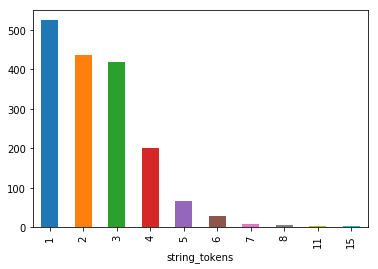

<Figure size 432x288 with 0 Axes>

In [134]:
lex_part_choice.groupby('string_tokens')['file'].size().plot(kind='bar')
plt.figure()

Проверим, что мы ничего не потеряли -- ошибок Choice of part of lexical item всё так же 1692:

In [135]:
sum(lex_part_choice.groupby('string_tokens')['file'].size())

1692

А как обстоит картина с Choice of lexical item?

<Figure size 432x288 with 0 Axes>

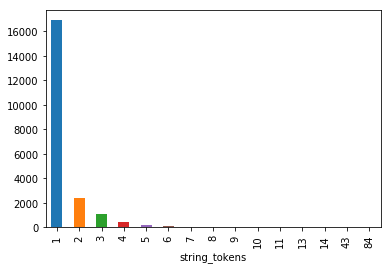

<Figure size 432x288 with 0 Axes>

In [136]:
lex_item_choice.groupby('string_tokens')['file'].size().plot(kind='bar')
plt.figure()

Ого, какая разница между односложными ошибками и всеми остальными! И мы снова ничего не потеряли по пути:

In [137]:
sum(lex_item_choice.groupby('string_tokens')['file'].size())

21014

Наконец, посмотрим ситуацию для Word choice:

<Figure size 432x288 with 0 Axes>

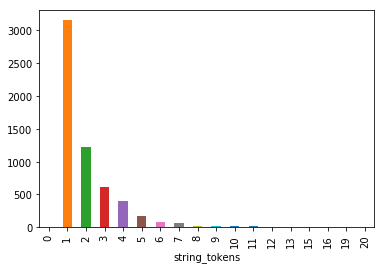

<Figure size 432x288 with 0 Axes>

In [138]:
Word_choice.groupby('string_tokens')['file'].size().plot(kind='bar')
plt.figure()

Нечто среднее, и для нашей задачи всё ещё лучше Choice of lexical item. Обязательная проверка:

In [139]:
sum(Word_choice.groupby('string_tokens')['file'].size())

5804

Официально остановим наш выбор на однотокенных ошибках типа Choice of lexical item (заодно посмотрим, сколько их в процентном соотношении по сравнению с другими ошибками того же типа):

In [142]:
q = lex_item_choice.groupby('string_tokens')['file'].size()

In [150]:
print("One-word errors account for "+"{:.2f}".format(100*q[1]/sum(q))+"% of Choice of lexical items errors. Therefore, we'll stick with this error class for future analysis")

One-word errors account for 80.41% of Choice of lexical items errors. Therefore, we'll stick with this error class for future analysis


Да, кстати, а сколько их всего?

In [152]:
q[1]

16897

На этом закончим анализ коллекции ошибок и перейдём к подготовке датасета для обучения модели BERT